In [ ]:
import webbrowser

#webbrowser.open('https://data.sdss.org/datamodel/files/APOGEE_ASTRONN/apogee_astronn.html') 

webbrowser.open('https://www.sdss.org/dr17/irspec/targets/special-programs/')

webbrowser.open('https://www.sdss.org/dr17/irspec/targets/')

webbrowser.open('https://www.sdss.org/dr17/irspec/spectro_data/')

webbrowser.open('https://www.sdss.org/wp-content/uploads/2014/08/apogee_tempsequence_new2.png')

webbrowser.open('https://www.sdss.org/press-releases/untangling-the-streamers-in-the-milky-way/')

webbrowser.open('https://ui.adsabs.harvard.edu/abs/2021ApJ...913...39S/abstract')

webbrowser.open('https://data.sdss.org/datamodel/files/APOGEE_ASPCAP/APRED_VERS/ASPCAP_VERS/allStar.html')

webbrowser.open('https://www.sdss.org/dr17/irspec/abundances/')

webbrowser.open('https://www.sdss.org/dr17/data_access/value-added-catalogs/?vac_id=the-astronn-catalog-of-abundances,-distances,-and-ages-for-apogee-dr17-stars')

In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
from http.client import BAD_REQUEST
import sys

import sklearn

from scipy.fftpack import fft
print(sys.executable)

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/Users/josephkarpinski/opt/anaconda3/bin/python


In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np

import pandas as pd

import scipy as sp

from scipy import *

import seaborn as sns 
#from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde

import ipywidgets as widgets

import ipyaladin.aladin_widget as ipyal

import plotly.express as px


print("\nInitialize!")


Initialize!


In [5]:
Ipython_default = plt.rcParams.copy()

# reset rcParams
#plt.rcParams.update(Ipython_default)

#plt.style.use('dark_background')

#print("Backup default plot background. \nSet Dark background.")

In [6]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 2000)

#df_Apogee.columns.sort_values().tolist()

In [7]:
df_Apogee = []

field = ""

unique_fields = []

In [39]:
def Plot002(f1, field):
    plt.style.use('dark_background')
    s0 = f1[f1['LOGG'] > 0]
    s1 = s0[s0['GAIAEDR3_PHOT_G_MEAN_MAG'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    BA1 = ff1[ff1['ASPCAP_GRID'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_GRID'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_GRID'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_GRID'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_GRID'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_GRID'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(6, 5))
    plt.subplot(111)
    if BA1.shape[0] > 0:
        plt.scatter(BA1['BP_RP'], BA1['M'], label=('BA stars: ' + str(BA1.shape[0])), marker='o', linewidth=0,s=20,c='violet')
    plt.scatter(Fd1['BP_RP'], Fd1['M'], label=('Fd stars: ' + str(Fd1.shape[0])), marker='o', linewidth=0,s=8,c='b')
    plt.scatter(GKd1['BP_RP'], GKd1['M'], label=('GKd stars: ' + str(GKd1.shape[0])), marker='o', linewidth=0,s=8,c='g')
    plt.scatter(GKg1['BP_RP'], GKg1['M'], label=('GKg stars: ' + str(GKg1.shape[0])), marker='o', linewidth=0,s=8,c='orange')
    plt.scatter(Mg1['BP_RP'], Mg1['M'], label=('Mg stars: ' + str(Mg1.shape[0])), marker='o', linewidth=0,s=8,c='r')
    if Md1.shape[0] > 0:
        plt.scatter(Md1['BP_RP'], Md1['M'], label=('Md stars: ' + str(Md1.shape[0])), marker='o', linewidth=0,s=8,c='aqua')
    ax = plt.gca()
    plt.gca().invert_yaxis()
    plt.xlabel('BP_RP', fontsize=10)
    plt.ylabel('Absolute Magnitude', fontsize=10)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=10)
    plt.show()

In [9]:
def scatter_2D(x, y, fig=None, ax=None, c='k', s=2.5, *args, **kwargs):
    
    if (fig or ax) is None:
        fig, ax = plt.subplots()
    
    plot = ax.scatter(x, y, c=c, s=s, *args, **kwargs)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=True, bottom=True,
                   labelleft=True, labelbottom=True)

In [10]:
def Ra_Dec(field):
    f1 = df_Apogee[df_Apogee['FIELD'] == field]
    RA1 = str(f1.RA.median())
    DEC1 = str(f1.DEC.median())
    ra_dec = str(RA1) + " " + str(DEC1)
    return((ra_dec))

In [11]:
def Plot_HR_Diagram(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()

    with plt.style.context('dark_background'):

        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):
            scatter_2D(df2['BP_RP'], df2['M'], ax=ax, 
                    c=df2['BP_RP'], cmap='RdYlBu_r',)

            ax.set(title='Field: {}    Stars: [{}]'.format(label, len(df2)), 
                xlabel='Color index $(bp_rp)$', 
                ylabel='Absolute Magnitude $M$', 
                xlim=(xmin,xmax), ylim=(ymax,ymin))
                
            ax.set_title(str(label), fontsize=25)
            ax.set_xlabel('Color index', fontsize=25)
            ax.set_ylabel(None)
            
    plt.show()

In [40]:
def HR_Details(fields_list):
    for i in range(1, len(fields_list) + 1):
        field = fields_list[i-1]
        f1 = df_Apogee[df_Apogee['FIELD'] == field]
        Plot002(f1, field)

In [13]:
def Plot_Feh(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()

    with plt.style.context('dark_background'):

        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):

            ff1 = df2[df2['FE_H'] > -9999]

            ff0 = ff1[ff1.LOGG > -9999]
            
            sns.set()
            plt.style.use('dark_background')

            s0 = ff1
            rbins = np.linspace(-3,1,50)

            ax.hist(s0.FE_H, bins=rbins,histtype='step',linewidth=2, color='r')
            ax.set_title(str(label), fontsize=25)
            ax.set_xlabel('FeH', fontsize=25)
            ax.set_ylabel(None)
    plt.show()

In [14]:
def Plot_LogG(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()

    with plt.style.context('dark_background'):

        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):

            ff1 = df2[df2['LOGG'] > -9999]

            ff0 = ff1[ff1.LOGG > -9999]
            
            sns.set()
            plt.style.use('dark_background')

            s0 = ff1
            rbins = np.linspace(0,6,50)
            
            ax.hist(s0.LOGG, bins=rbins,histtype='step',linewidth=2, color='g')
            ax.set_title(str(label), fontsize=25)
            ax.set_xlabel('LogG', fontsize=25)
            ax.set_ylabel(None)
    plt.show()

In [15]:
def Plot_Age(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()

    with plt.style.context('dark_background'):

        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):

            ff1 = df2[df2['LOGG'] > -9999]

            ff0 = ff1[ff1.LOGG > -9999]
            
            sns.set()
            plt.style.use('dark_background')

            s0 = ff1
            rbins = np.linspace(0,14,50)
            ax.hist(s0.age, bins=rbins,histtype='step',linewidth=2, color='orange')
            ax.set_title(str(label), fontsize=25)
            ax.set_xlabel('Age', fontsize=25)
            ax.set_ylabel(None)
    plt.show()

In [16]:
def Plot_Distance(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()

    with plt.style.context('dark_background'):

        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):

            ff1 = df2[df2['LOGG'] > -9999]

            ff0 = ff1[ff1.LOGG > -9999]
            
            sns.set()
            plt.style.use('dark_background')

            s0 = ff1
            rbins = np.linspace(xmin,xmax,50)
            
            ax.hist(s0.Kpc, bins=rbins,histtype='step',linewidth=2, color='b')
            ax.set_title(str(label), fontsize=25)
            ax.set_xlabel('Distance [kpc]', fontsize=25)
            ax.set_ylabel(None)
           
    plt.show()

In [17]:
def Plot_Alpha_Elements(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()

    with plt.style.context('dark_background'):

        fig, axs = plt.subplots(1,10, figsize=(50,6))
        for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):

            ff1 = df2[df2['LOGG'] > -9999]

            ff0 = ff1[ff1.LOGG > -9999]
            
            sns.set()
            plt.style.use('dark_background')

            s0 = ff1
            rbins = np.linspace(-0.5,0.5,50)
    
            ax.hist(s0.ALPHA_M, bins=rbins,histtype='step',linewidth=2, color='r')
            ax.set_title(str(label), fontsize=25)
            ax.set_xlabel('Alpha Elements', fontsize=25)
            ax.set_ylabel(None)
            
    plt.show()

In [18]:
def panel_plot(f1, label, xmin, xmax, ymin,  ymax):

    sns.set_style('white')

    fig = plt.figure(figsize=(25,4))

    s0 = f1[f1['GAIAEDR3_PMRA'] > -9999]
    s1 = s0[s0['GAIAEDR3_PHOT_G_MEAN_MAG'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    
    if ff1.shape[0] > 10:
    
        ax1 = fig.add_subplot(131)
        sns.set_style('darkgrid')
        image = ax1.scatter(ff1['RA'], ff1['DEC'], label=label, marker='.', linewidth=0,
        c=ff1.LOGG,edgecolor='k',cmap="jet")
        ax1.set_xlabel('RA', fontsize=12)
        ax1.set_ylabel('DEC', fontsize=12)
        ax1.set_title(str(label) + "  \nAverage LogG: " + str(round(ff1.LOGG.mean(),2)), fontsize=12)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("LogG",size=12)

        ax2 = fig.add_subplot(132)
        sns.set_style('white')
        sns.set(font_scale = 0.8)
        labels = ['AL_FE','CA_FE','CE_FE','CI_FE','CO_FE','CR_FE','C_FE','K_FE','MG_FE','MN_FE','NA_FE','NI_FE','N_FE','O_FE','SI_FE','S_FE','TIII_FE','TI_FE','V_FE','ALPHA_M']
        corr=ff1[['AL_FE','CA_FE','CE_FE','CI_FE','CO_FE','CR_FE','C_FE','K_FE','MG_FE','MN_FE','NA_FE','NI_FE','N_FE','O_FE','SI_FE','S_FE','TIII_FE','TI_FE','V_FE','ALPHA_M']].corr()
        mask = np.zeros_like(corr)
        triangle_indices = np.triu_indices_from(mask)
        mask[triangle_indices] = True
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        heatmap = sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 6}, cmap = cmap)
        heatmap.set_title(str(label) + " Correlation Heatmap\nStars: " + str(ff1.shape[0]))
        heatmap.set_xticklabels(labels, size = 8)
        heatmap.set_yticklabels(labels, size = 8)

        # A quiver plot (spatial plot with arrows that describe each object's proper motion)
        ax3 = fig.add_subplot(133)
        sns.set_style('white')
        ax3.quiver(ff1.RA, ff1.DEC, ff1.GAIAEDR3_PMRA, ff1.GAIAEDR3_PMDEC, 0)
        ax3.set_title(str(label) + " Proper Motions",fontsize=10)
        ax3.set_xlabel("Right Ascension",fontsize=10)
        ax3.set_ylabel("Declination",fontsize=10)
    
        plt.show()

In [19]:
def Plot_Proper_Motion(fields_list,xmin, xmax, ymin, ymax):

    target1 = df_Apogee[df_Apogee['FIELD'] == fields_list[0]]
    target2 = df_Apogee[df_Apogee['FIELD'] == fields_list[1]]
    target3 = df_Apogee[df_Apogee['FIELD'] == fields_list[2]]
    target4 = df_Apogee[df_Apogee['FIELD'] == fields_list[3]]
    target5 = df_Apogee[df_Apogee['FIELD'] == fields_list[4]]
    target6 = df_Apogee[df_Apogee['FIELD'] == fields_list[5]]
    target7 = df_Apogee[df_Apogee['FIELD'] == fields_list[6]]
    target8 = df_Apogee[df_Apogee['FIELD'] == fields_list[7]]
    target9 = df_Apogee[df_Apogee['FIELD'] == fields_list[8]]
    target10 = df_Apogee[df_Apogee['FIELD'] == fields_list[9]]

    sptype_len_list = [target1, target2, target3, target4, target5, target6, target7, target8, target9, target10]
    #sptype_list = fields_list[0:10]
    sptype_list = fields_list[0:len(fields_list)]

    plt.close()
    #with plt.style.context('dark_background'):

    #fig, axs = plt.subplots(2, figsize=(50,6))
    #for df2, label, ax in zip(sptype_len_list, sptype_list, axs.reshape(-1)):
    for df2, label in zip(sptype_len_list, sptype_list):

        #Plot_Rows_Lims(fields_list,-0.5, 4.5, -5, 13)
        panel_plot(df2, label, xmin, xmax, ymin, ymax)

    plt.show()

### Select a target by un-commenting the df_Apogee target of interest and comment out any other selected targets

In [20]:
"""
Globular Clusters
https://www.sdss.org/dr16/irspec/targets/

Globular cluster stars from APOGEE were selected independently 
for each system using the following priority scheme:
1. Known members based on chemical abundances and stellar parameters 
   determined from prior spectroscopic information ( apogee2_target2 =2 and 10)
2. Candidates selected with radial velocities (apogee2_target2=10)
3. Candidates selected with proper motions (apogee2_target2=10)
4. Photometric candidates

Targeted Globular Clusters:

Survey ComponentCluster Names

APOGEE-1
NGC4147, M53, M3, NGC5466, NGC5634, M5, M107, M13, NGC6229, M92, NGC6715, M15, M2

APOGEE-2N
M12, M15, M71, M5

APOGEE-2S
47 Tucanae, M10, M12, M22, M4, M55, M68, M79, NGC1851, NGC2808, NGC288, 
NGC3201, NGC362, NGC6388, NGC6397, NGC6441, NGC6752, Omega Centauri

APOGEE-2 designs belonging to globular cluster fields have PROGRAMNAME 
tag value “cluster_gc”, “cluster_gc1”, “cluster_gc2”, or “cluster_gc3”.

Globular cluster candidates may not be flagged appropriately in DR16.
""";

gc1 = pd.read_csv('cluster_gc,apogee.csv')
gc2 = pd.read_csv('cluster_gc,cluster_gc1.csv')
gc3 = pd.read_csv('cluster_gc.csv')
gc4 = pd.read_csv('cluster_gc1.csv')
gc5 = pd.read_csv('cluster_gc2,cluster_gc1.csv')
gc6 = pd.read_csv('cluster_gc2.csv')
gc7 = pd.read_csv('clusters_gc1.csv')
gc8 = pd.read_csv('clusters_gc2.csv')
gc9 = pd.read_csv('clusters_gc3.csv')

df_Apogee = pd.concat([gc1, gc2, gc3, gc4, gc5, gc6, gc7, gc8, gc9], ignore_index=True, sort=False)


In [1]:
"""
Disk
https://www.sdss.org/dr16/irspec/targets/

For APOGEE-1 targets, a single color limit of (J−Ks)0≥ 0.5 mag was applied in disk fields. 
For APOGEE-2, a dual-color limit was used, with a defined fraction of the targets 
having 0.5 ≤(J−Ks)0 ≤ 0.8 mag and the rest with (J−Ks)0 ≥ 0.8 mag. 
The intended fraction of targets in each color bin is recorded in the apogee2Design 
file for each plate design. For APOGEE-1 targets, disk fields were selected in the 
Galactic region 24∘ ≤ l ≤ 240°, |b| ≤16°, while for APOGEE-2 
the disk region corresponds to 20∘ ≤ l ≤ 340∘, |b| ≤25∘. 
APOGEE disk fields had depths of H=12.2, 12.8, and in some cases 13.8 mag.
In some APOGEE-2 disk cohorts, the bright limit was reduced to H=10 mag 
to increase the number of faint, and hopefully distant, disk targets. 
This reduced magnitude limit was applied for all the fields were we expected 
to fill both color bins with the reduced magnitude range; 
stars selected this way are flagged with APOGEE2_TARGET2 bit 23.

In the APOGEE-2N Bright Time Extension, a focused effort was made 
to target substructure in the outer disk. 

This occurred in two parts: (1) we explicitly targeted confirmed substructure members
 from previous work (APOGEE2_TARGET2 bit 7) and (2) we identified substructure candidates 
 using proper motion criteria to remove foreground stars (APOGEE2_TARGET2 bit 8). 
 These fields have PROGRAMNAME “odisk” and have “_btx” appended to the FIELD. 

 APOGEE-2 designs from disk fields that are not part of APOGEE-2N bright Time Extension 
 have PROGRAMNAME “disk”, “disk1”, or “disk2”. 
 
 In APOGEE-2, the "disk1" program is meant to mirror the APOGEE-1 disk footprint, 
 "disk2" are new fields, and "disk" are randomly placed fields.
""";

#df_Apogee = pd.read_csv('disk.csv')
#df_Apogee = pd.read_csv('disk1.csv')


In [23]:
"""
Outer Disk

""";

#df_Apogee = pd.read_csv('odisk.csv')

In [24]:
"""
Halo
https://www.sdss.org/dr16/irspec/targets/

For APOGEE-1 targets, a single limit of (J−Ks)0≥0.3 mag was used for halo fields; 
the bluer color limit was enacted to boost counts because halo-fields have far fewer target candidates). 
This color range was maintained for APOGEE=2 halo fields. For APOGEE-1 targets, 
halo fields were selected in the galactic region |b|>16∘, 
while for APOGEE-2N and APOGEE-2S the halo region corresponds to |b|≥25∘. 
APOGEE halo fields had depths of H= 12.2, 12.8, or 13.8 mag, 
to increase the number of distant stars and, thus, halo membership fractions.
Often for the APOGEE-2 halo program, we use Washington M, Washington T2, 
and DDO51 (Wash+D, hereafter) photometry to classify stars as dwarfs or giants 
prior to their selection as spectroscopic targets, 
in addition to the reddening and magnitude limits applied for each field 
(e.g., Majewski et al. 2000). 
This pre-selection is employed in these particular fields to increase the selection efficiency of giant stars, 
which have an intrinsically higher dwarf fraction for APOGEE's magnitude range 
than for fields in the Galactic plane. 
Stars targeted as photometrically classified giants have bit 7 set in 
APOGEE_TARGET1 or APOGEE2_TARGET1 and are prioritized over photometrically classified dwarfs 
which have bit 8 set in APOGEE_TARGET1 or APOGEE2_TARGET1. 

All APOGEE-2 designs from halo fields that are not part of APOGEE-2N bright Time Extension have PROGRAMNAME “halo.”

In APOGEE-2S besides the stars selected using the standard criteria, 
we explicitly added high priority targets based on spectroscopic and proper motion information, 
to increase our halo member fraction. 

Four of these fields are included in DR16 and correspond to 313+29, 294+40, 256+26, and 255-27.

In the APOGEE-2N Bright Time Extension, a focused effort was made to target more distant stars. 
This occurred in two parts:
 (1) we explicitly targeted confirmed K-giants from SEGUE (APOGEE2_TARGET2 bit 20) and 
 (2) we identified halo candidates using proper motion criteria that removed 
 foreground stars (APOGEE2_TARGET2 bit 21). 
 
 Designs from these halo fields will have PROGRAMNAME “halo_btx” and “_btx” is appended to FIELD.
""";

halo1 = pd.read_csv('halo.csv')
halo2 = pd.read_csv('halo_btx.csv')

#df_Apogee = pd.concat([halo1, halo2], ignore_index=True, sort=False)


In [25]:
"""
The Magellanic Clouds
https://www.sdss.org/dr16/irspec/targets/

 The APOGEE-2S Magellanic Cloud (MC) program targets 
 the 12 Small Magellanic Cloud (SMC) fields and 17 Large Magellanic Cloud (LMC) fields. 
 
 All MC fields have a single cohort single design, with 9 and 12 visits for LMC, and SMC, respectively. 
 
 The faint magnitude limit of MC fields varies significantly across the program from H~12.5 mag to H=14.9 mag, 
 and the selection of targets in each field corresponds to a specific combination of several sub-programs 
 targeting different stellar populations in the clouds. 
 
 A full description of the targeting for the Magellanic Clouds program can be found in Nidever et al. (submitted).

MC members have targeting bit 22 set in APOGEE2_TARGET1, 
while MC photometric candidates have targeting bit 23 set in APOGEE2_TARGET1. 

All designs belonging to Magellanic Cloud fields have PROGRAMNAME tag value “magclouds”.
""";

#df_Apogee = pd.read_csv('magclouds.csv')

In [26]:
"""
Open Clusters
https://www.sdss.org/dr16/irspec/targets/

Open clusters from APOGEE were chosen to cover a wide range of 
age, metallicity, and galactocentric distance. 
Frinchaboy et al. 2013 describes the Open Cluster Chemical Abundance and Mapping survey (OCCAM) 
and includes a detailed discussion of the targeting algorithms. 
Donor et al. (2018) provides an update for the 
Open Cluster Chemical Abundance and Mapping survey (OCCAM), 
including revisions to the target selection using early releses from Gaia.

The sense of this targeting is similar to that for the Globular clusters, which is:
1. Known members based on chemical abundances and stellar parameters 
determined from prior spectroscopic information
2. Candidates selected with radial velocities
3. Candidates selected with proper motions
4. Photometric candidates

However, photometric candidates are selected such that stars have 
a common redenning value (see discussion in Frinchaboy et al. 2013). 
All targets selected in the open cluster program will have apogee2_target1=9 .

The complete list of Open Clusters targeted in APOGEE is presented below:

Targeted Open Clusters:

Survey Component

Cluster Names

APOGEE-1
Berkeley 29 (field 198+08), Pleiades, NGC188 NGC2158, M35, NGC2243, 
NGC2420, M67, NGC6791, NGC6819, NGC7789

APOGEE-2N
NGC188, NGC2243

APOGEE-2S
NGC2243, M67, NGC2204, NGC2243, NGC6253, NGC5999, NGC6583, NGC6603, Trumpler20, Collinder 261

All APOGEE-2 designs belonging to open cluster fields have PROGRAMNAME tag value “cluster_oc”.
""";

#df_Apogee = pd.read_csv('cluster_oc.csv')

In [27]:
"""
Stellar Streams
https://www.sdss.org/dr16/irspec/targets/

APOGEE has targeted a variety of stellar streams 
that either represents the remnants of galactic mergers, t
idally disrupted clusters or have a yet unknown nature.

In APOGEE-2N, we targeted five streams: 
1. the Triangulum-Andromeda (TriAnd) structure, 
2. the tidal tails of the globular cluster Palomar5, 
3. the Orphan stream, 
4. the GD-1 stream, and the 
5. Sagittarius tidal tail.

To observe the TriAnd structure, we selected the 5 fields (TRIAND-1 to TRIAND-5) 
where the standard halo selection without Wash+D photometry selected most TriAnd candidates 
from Sheffield et al. (2014) and Chou et al. (2011). 

Additional targeting in the area spanned by TriAnd occurred in the 
Bright Time Extension program in the outer disk.

For the Palomar 5, Orphan, GD1, and Sagittarius streams, 
we used a variety of catalogs to select likely members, 
using the following priority ranking:

1. Stars classified as giants using Wash+D photometry, 
and photometric candidates using the location in (J−Ks)0 versus H CMD.

2. (J−Ks)0 versus H photometric candidates without Wash+D dwarf/giant classification

3. Wash+D-classified giants with lower membership probability based on the 
(J−Ks)0 versus H CMD location.

4. Stars without Wash+D dwarf/giant classification and with lower membership probability 
based in the (J−Ks)0 versus H CMD location.

All stream photometric candidates have targeting bit 19 set in APOGEE2_TARGET1, 
and the corresponding Wash+D flag according to their classification. 

All designs belonging to stream fields have PROGRAMNAME tag value “halo_stream”.
""";

#df_Apogee = pd.read_csv('halo_stream.csv')

In [28]:

"""
Young Clusters
https://www.sdss.org/dr16/irspec/targets/

APOGEE-2 is targeting several deeply embedded young stellar clusters, 
to characterize the earliest stages of the older populations that dominate the rest of the sample. 
By the end of SDSS-IV, APOGEE-2 will have observed approximately 200-1000 sources 
in each of ∼10 embedded clusters. 

This program is an extension of the APOGEE-1 IN-SYNC ancillary program 
and shares similar targeting procedures. 

Targets are drawn from pre-existing catalogs of young stellar objects, 
identified via their optical/IR photometry, IR excess, X-ray activity, 
Li abundance, H-α excess, or variability.

Cottle et al. 2018 describes the target selection for the APOGEE-2 programs. 
Cottaar et al. 2014 describes the IN-SYNC program from APOGEE-1.

Note that the ASPCAP pipeline does not include models for pre-main-sequence stars, 
so the automated synthetic spectral fits are not likely to be meaningful for most of these sources. 
Sources targeted as part of the young cluster program are flagged with bit 5 of APOGEE2_TARGET3. 

All designs belonging to young cluster fields have PROGRAMNAME tag value “yso” or "yso_btx."

Targeted Young Clusters:Survey ComponentCluster NamesAPOGEE-1 
See IN-SYNC Ancillary ProgramAPOGEE-2N Orion A, Orion B, Orion B1, λ Ori, Pleiades, 
Taurus L1495, Taurus L1521, Taurus L1527, Taurus L1536, Taurus L1551 , Taurus L1517, 
α Per, NGC2264, Cygnus-X, W34 APOGEE-2S See External Programs
""";

#df_Apogee = pd.read_csv('yso.csv')

In [29]:
df_Apogee.columns.sort_values().tolist()

['ALPHA_M',
 'AL_FE',
 'AL_H',
 'AL_H_ERR',
 'ANDFLAG',
 'ANDFLAGS',
 'APOGEE2_TARGET1',
 'APOGEE2_TARGET2',
 'APOGEE2_TARGET3',
 'APOGEE2_TARGET4',
 'APOGEE_ID',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'ASPCAPFLAG',
 'ASPCAPFLAGS',
 'ASPCAP_GRID',
 'BP_RP',
 'CA_FE',
 'CA_H',
 'CA_H_ERR',
 'CE_FE',
 'CI_FE',
 'CI_H',
 'CI_H_ERR',
 'CO_FE',
 'CO_H',
 'CO_H_ERR',
 'CR_FE',
 'CR_H',
 'CR_H_ERR',
 'CU_FE',
 'C_FE',
 'C_FE_ERR',
 'C_FE_FLAG',
 'C_H',
 'C_H_ERR',
 'DEC',
 'DEC_APOGEE',
 'DEC_astroNN',
 'EminusEc',
 'EminusEc_err',
 'Energy',
 'Energy_err',
 'FE_H',
 'FE_H_ERR',
 'FE_H_astroNN',
 'FIELD',
 'FPARAM',
 'FPARAM_GRID',
 'GAIAEDR3_DR2_RADIAL_VELOCITY',
 'GAIAEDR3_PARALLAX',
 'GAIAEDR3_PHOT_BP_MEAN_MAG',
 'GAIAEDR3_PHOT_G_MEAN_MAG',
 'GAIAEDR3_PHOT_RP_MEAN_MAG',
 'GAIAEDR3_PMDEC',
 'GAIAEDR3_PMRA',
 'GLAT',
 'GLON',
 'H',
 'J',
 'K',
 'K_FE',
 'K_H',
 'K_H_ERR',
 'Kpc',
 'LOCATION_ID',
 'LOGG',
 'LOGG_ERR',
 'LOGG_SPEC',
 'LOGG_astroNN',
 'LY',
 'L_sun',
 'LightYears',
 'Lz',
 'Lz_

In [30]:
## Checking for the null values

#pd.isnull(df_Apogee).sum()

In [31]:
unique_fields = sp.unique(df_Apogee['FIELD'])

print("\nSample Fields: " + str(unique_fields.shape[0]))


Sample Fields: 25


In [32]:
for field in unique_fields:
    print(str(field))

47TUC
M10
M12-N
M12-S
M15
M22
M4
M55
M5PAL5
M68
M71
M79
N1851
N2298
N2808
N288
N3201
N362
N6388
N6397
N6441
N6752
Omegacen
Omegacen2
Sgr_faint


In [33]:
# Set i to the target occurence of interest {0, 1, 2, 3, 4, ,,,}

i = 0

field = unique_fields[i]
print(field)

ra_dec = Ra_Dec(field)
print(str(ra_dec)) 

fov = 3.0

aladin = ipyal.Aladin(target=ra_dec,  fov=fov, survey='P/allWise/color')
aladin

47TUC
6.078483 -72.069038


Aladin(fov=3.0, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'ov…

In [ ]:
#df_Apogee['ALPHA_M'].describe()

### Select targets in groups of ten

['47TUC' 'M10' 'M12-N' 'M12-S' 'M15' 'M22' 'M4' 'M55' 'M5PAL5' 'M68']


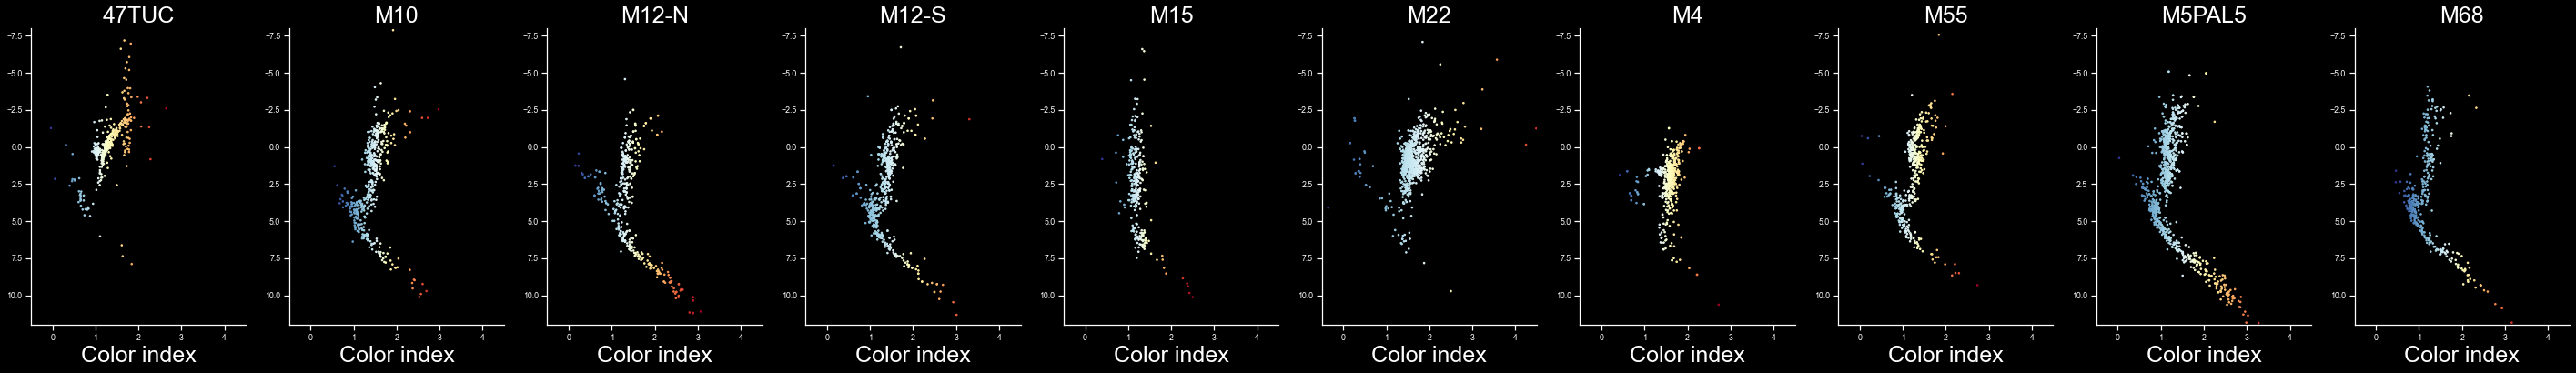

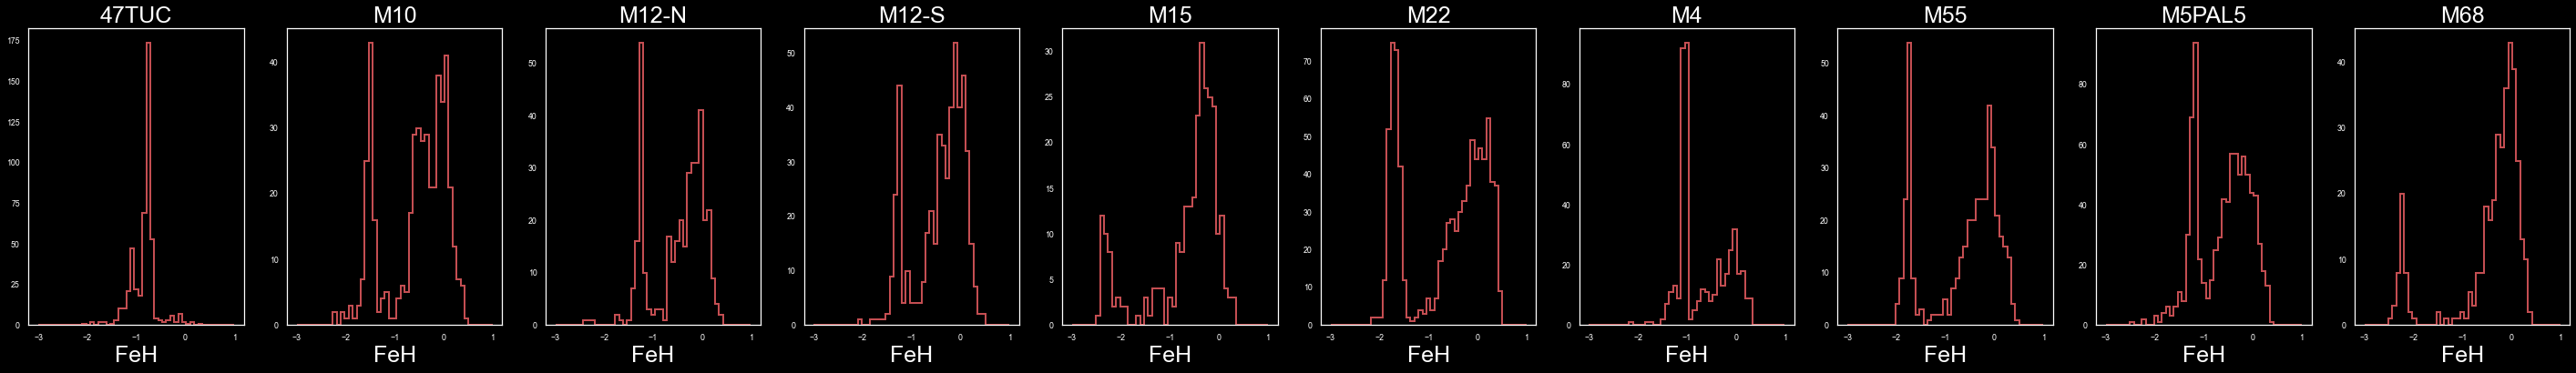

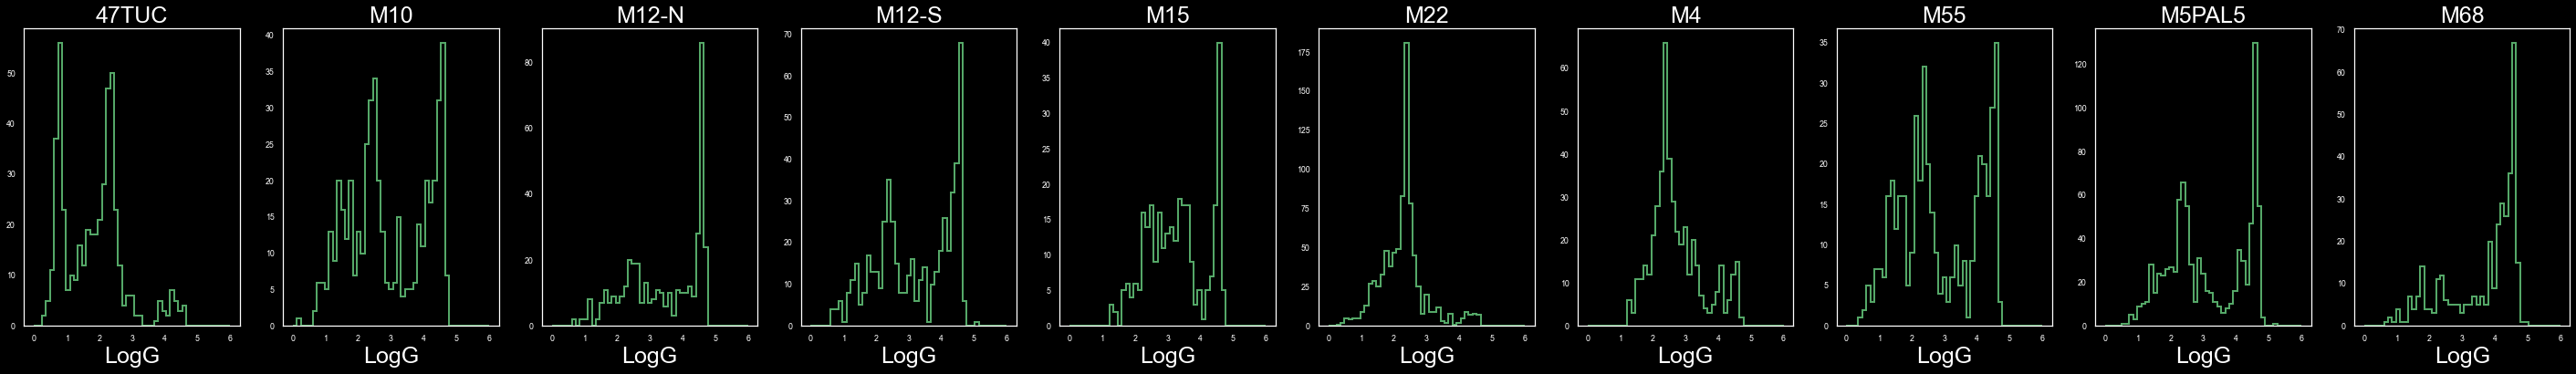

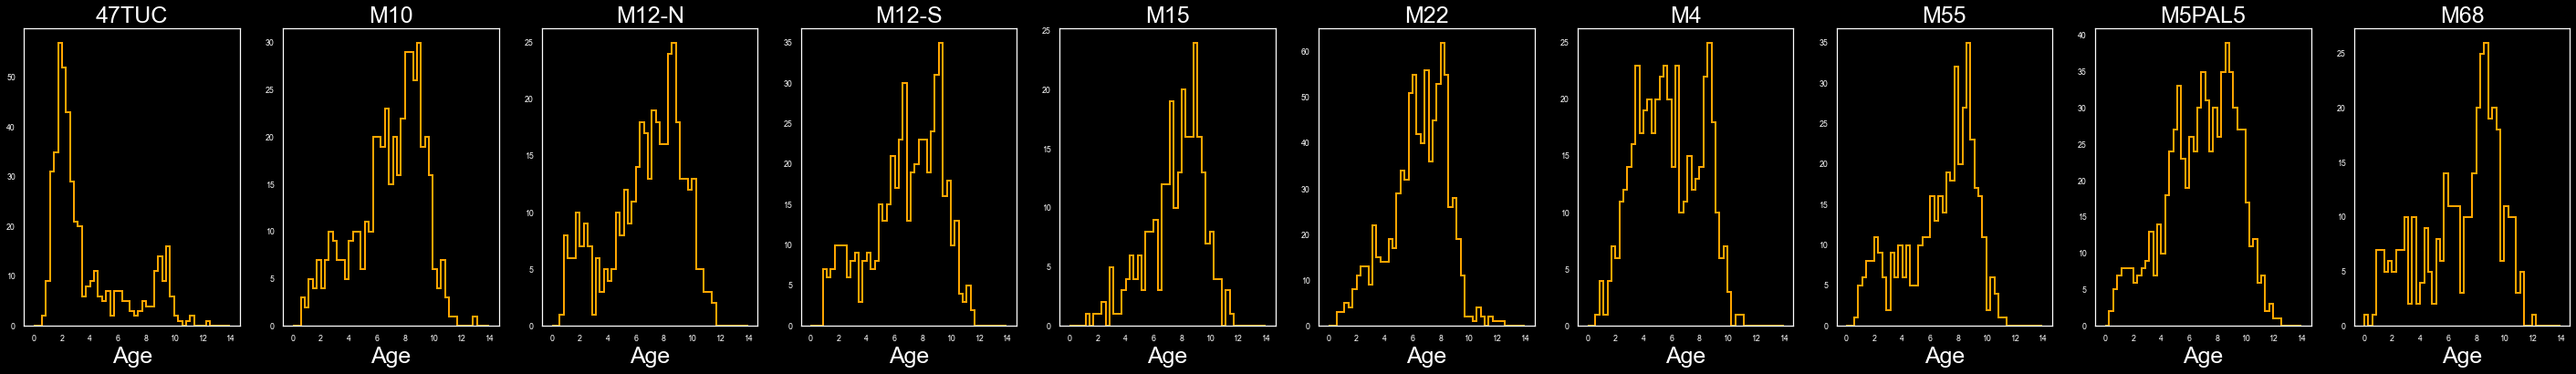

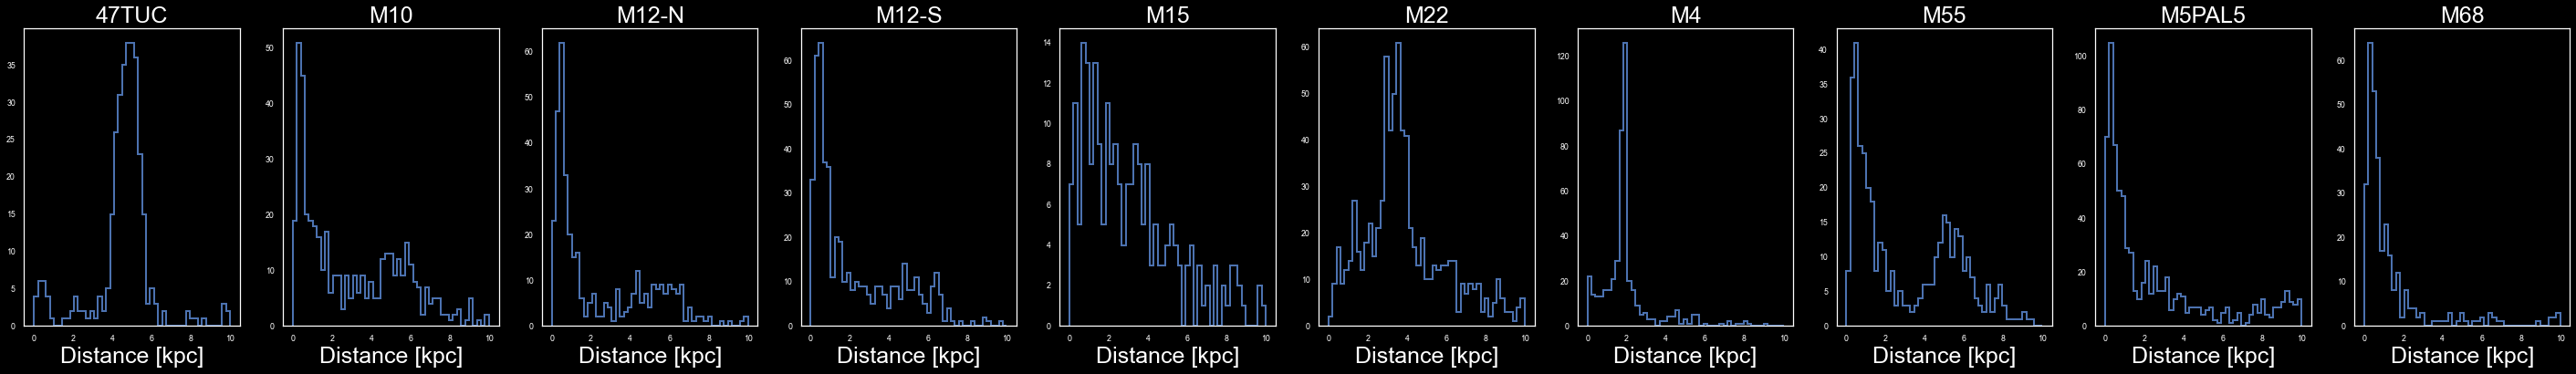

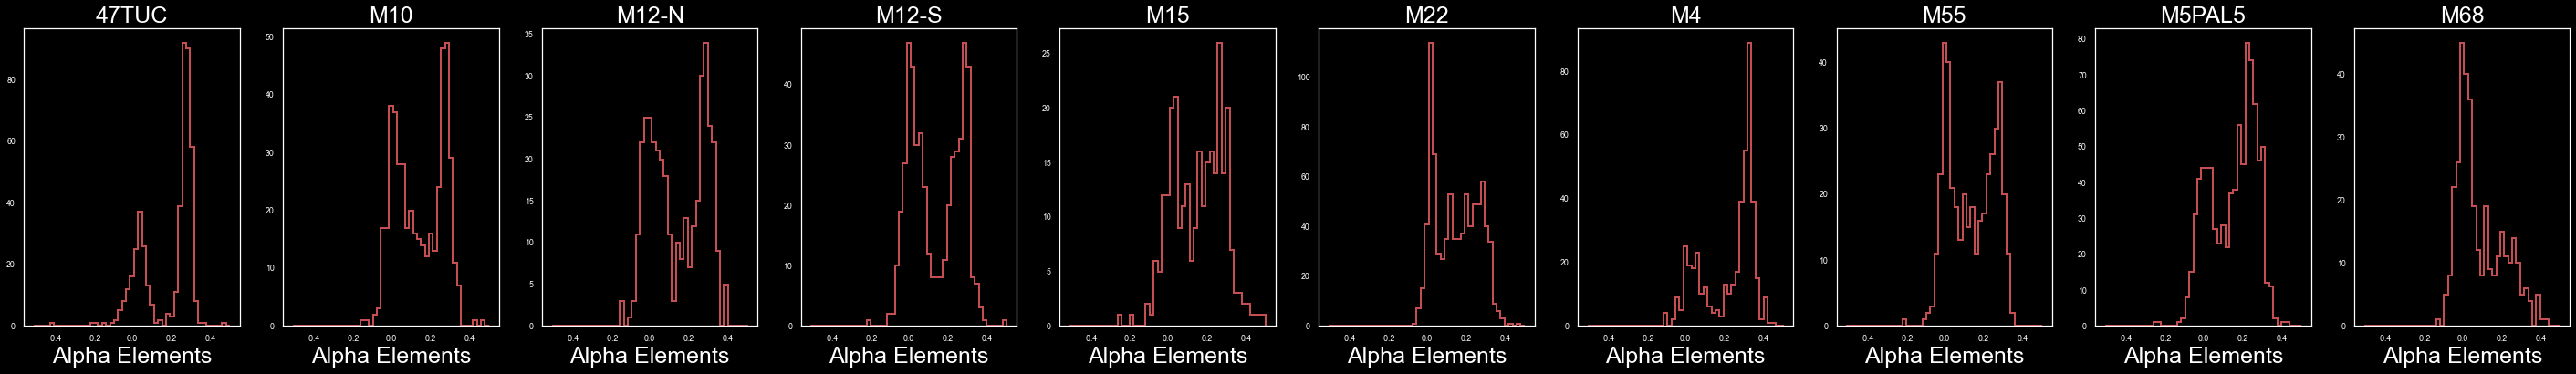

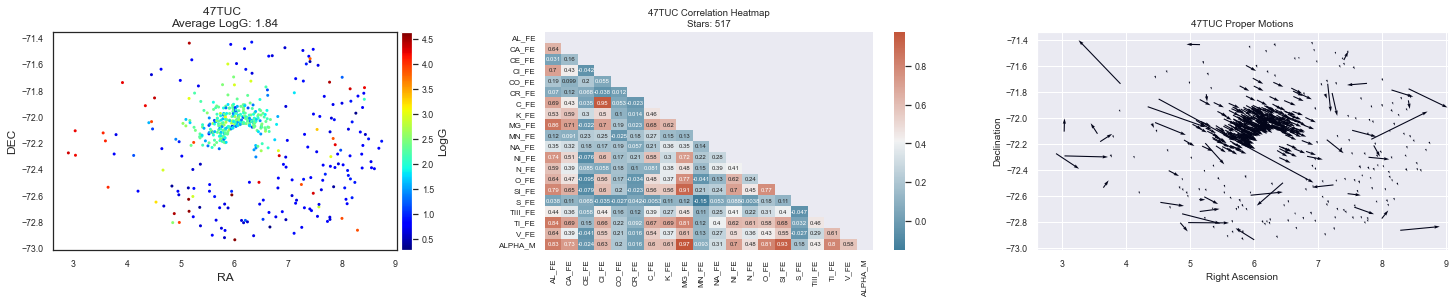

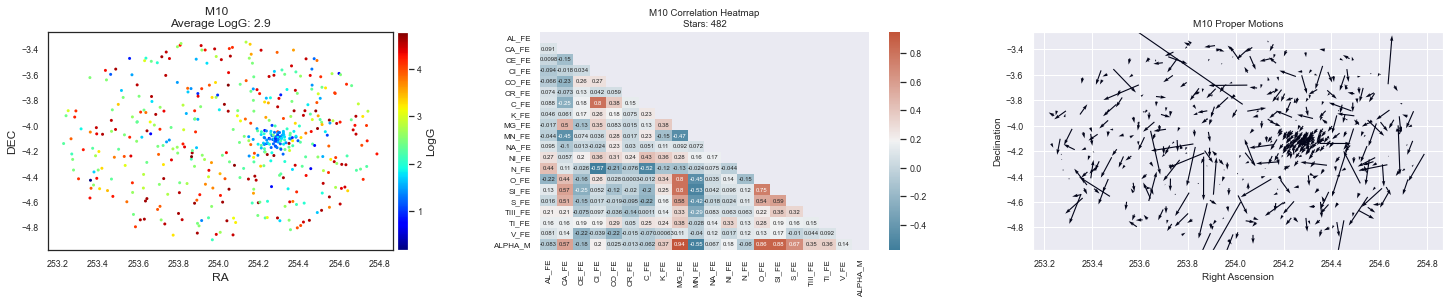

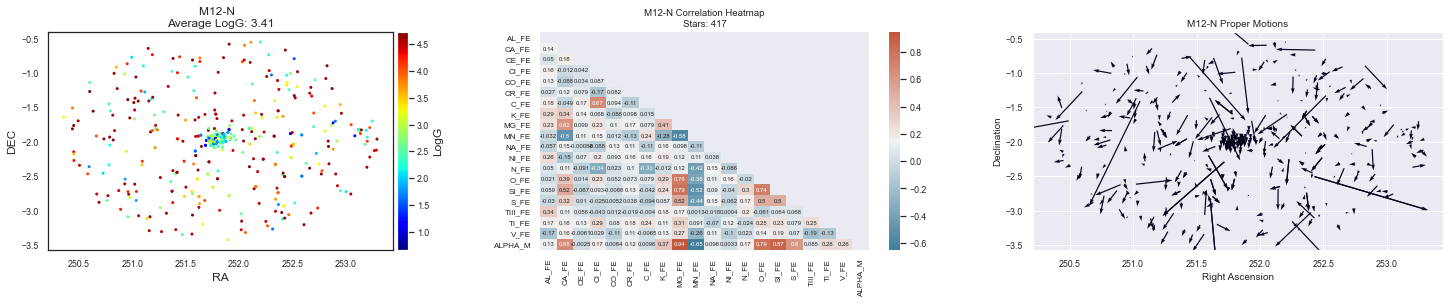

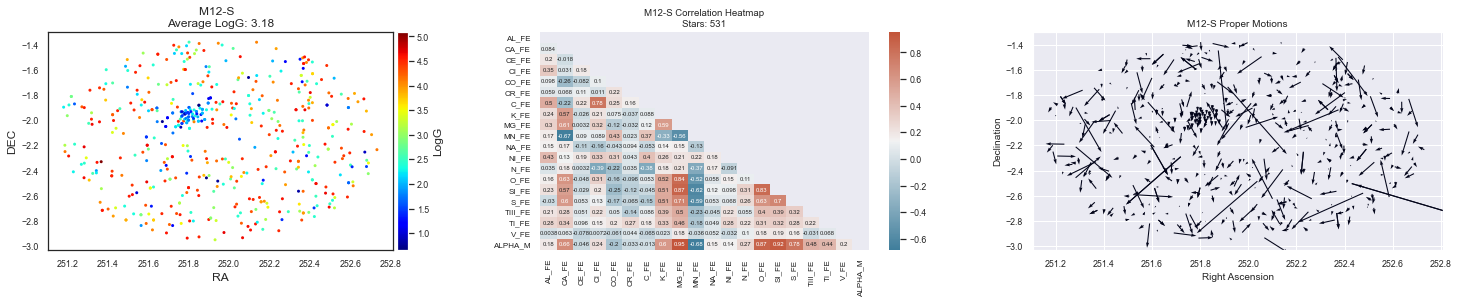

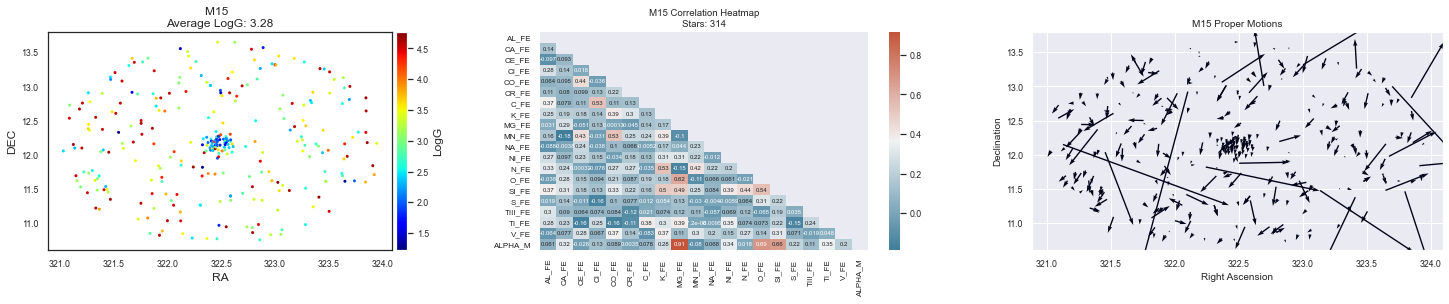

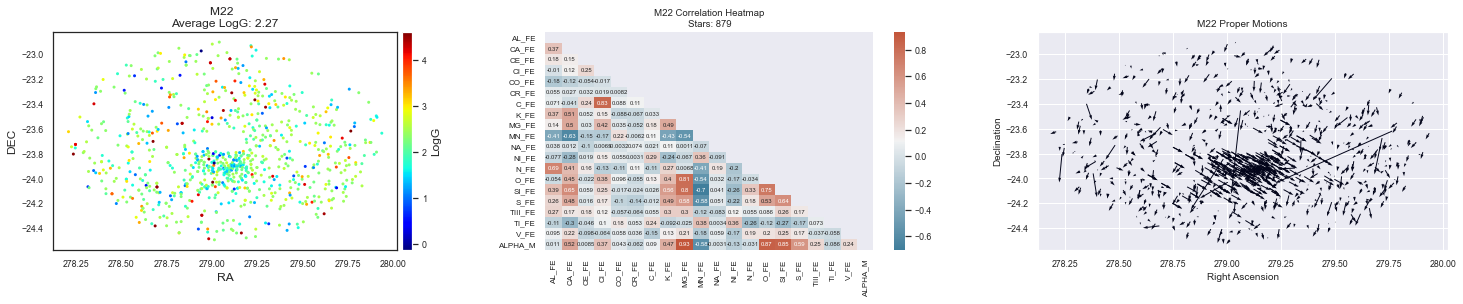

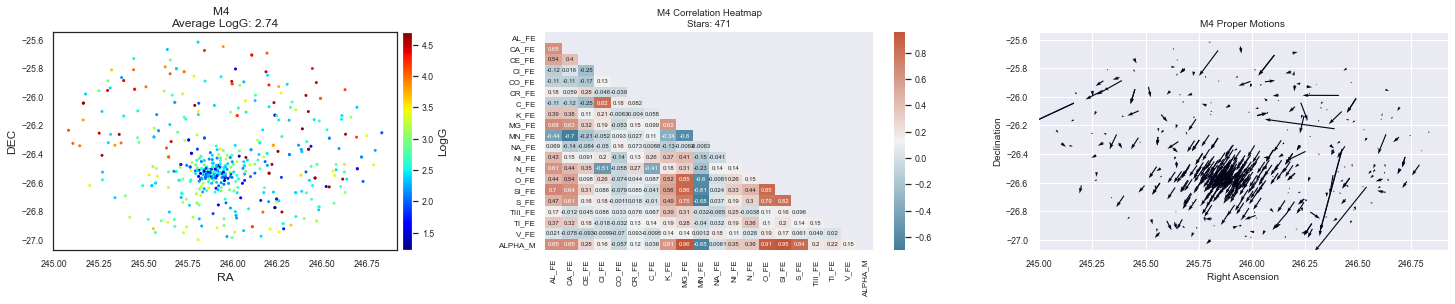

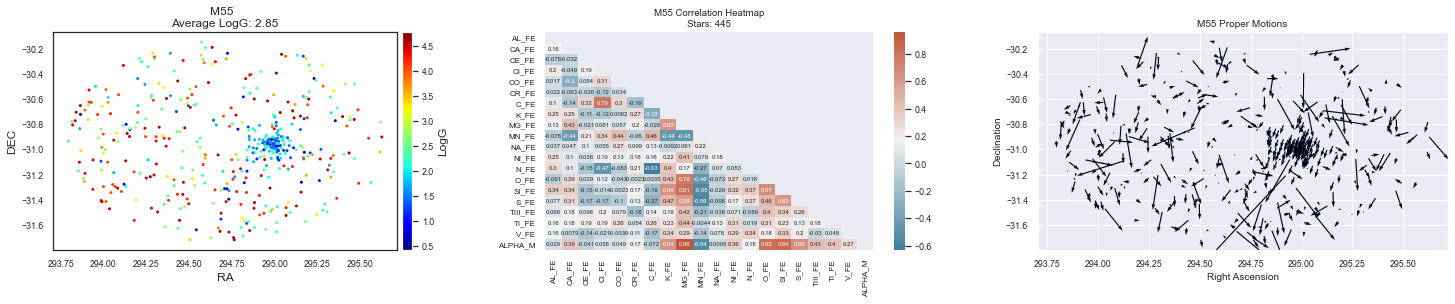

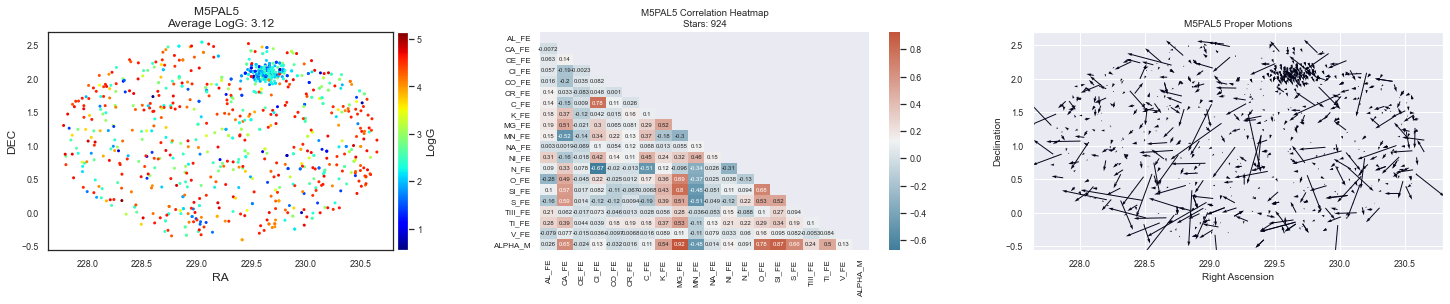

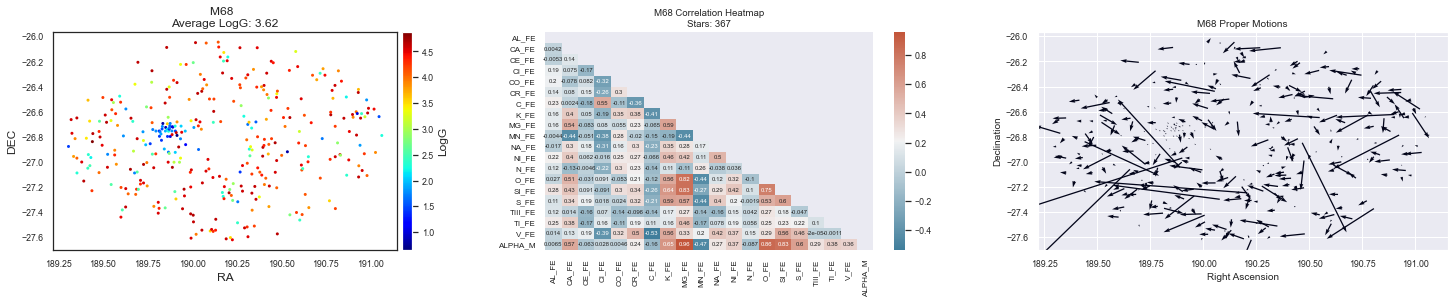

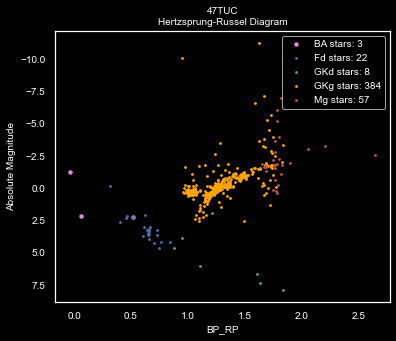

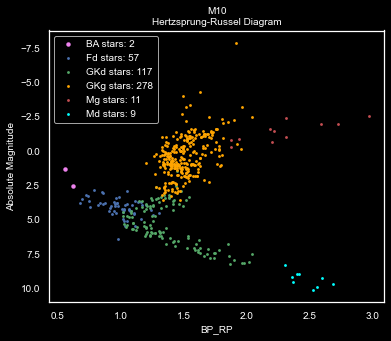

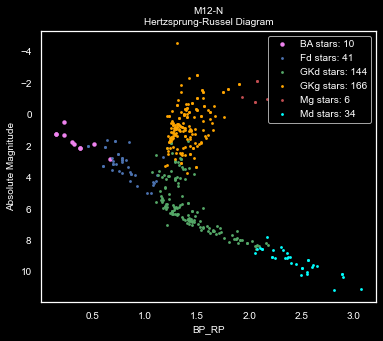

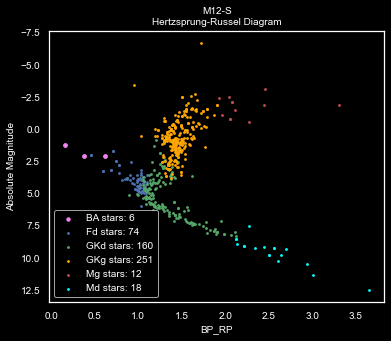

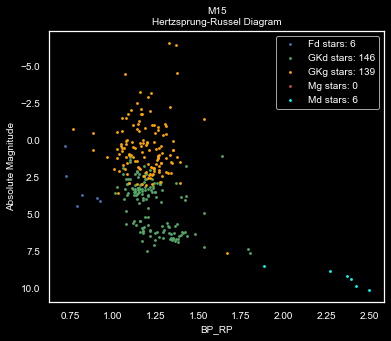

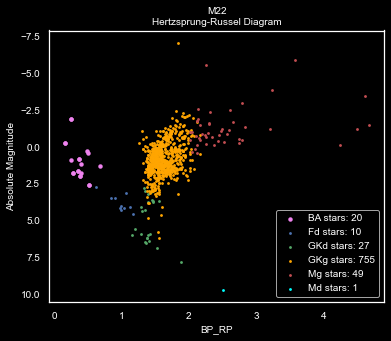

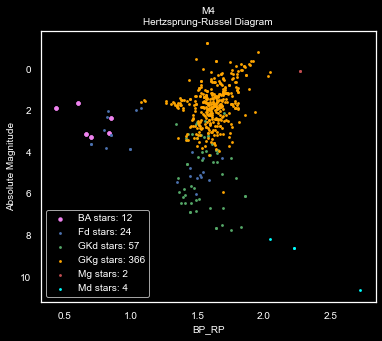

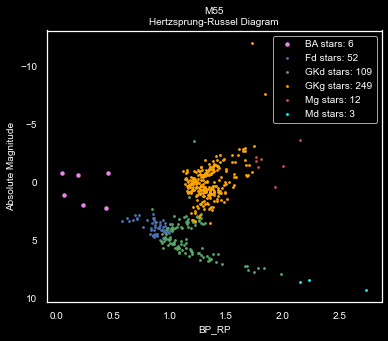

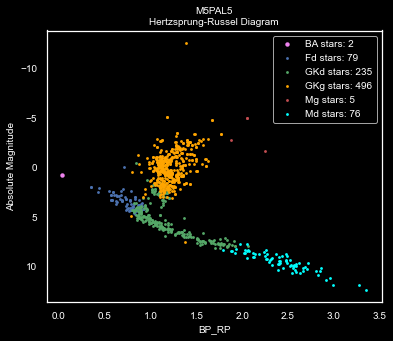

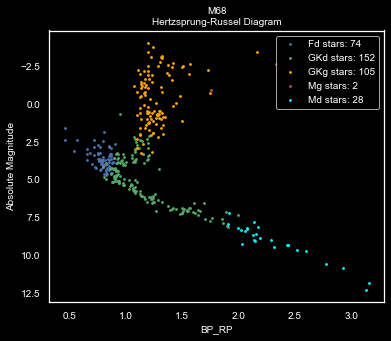

In [41]:
fields_list = unique_fields[0:10]

print(fields_list)

print_hr_details_flag = "Y"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

['M71' 'M79' 'N1851' 'N2298' 'N2808' 'N288' 'N3201' 'N362' 'N6388' 'N6397']


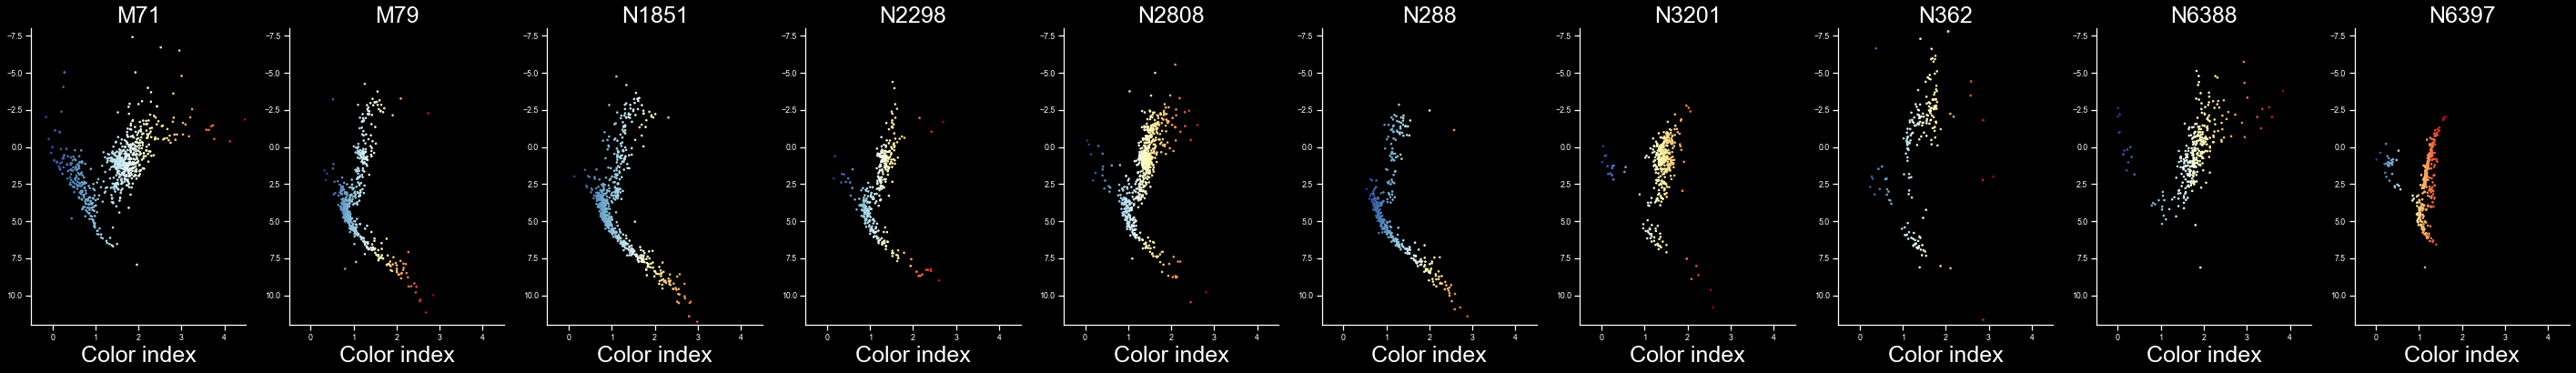

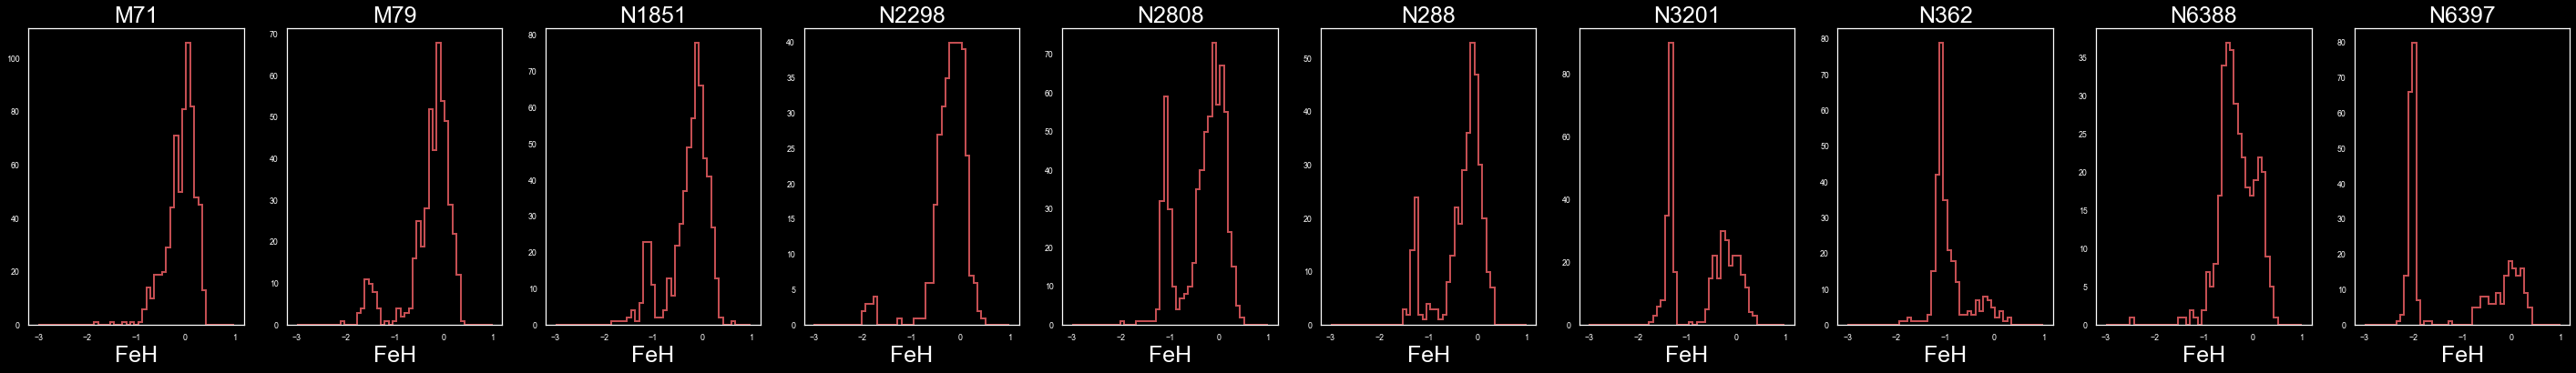

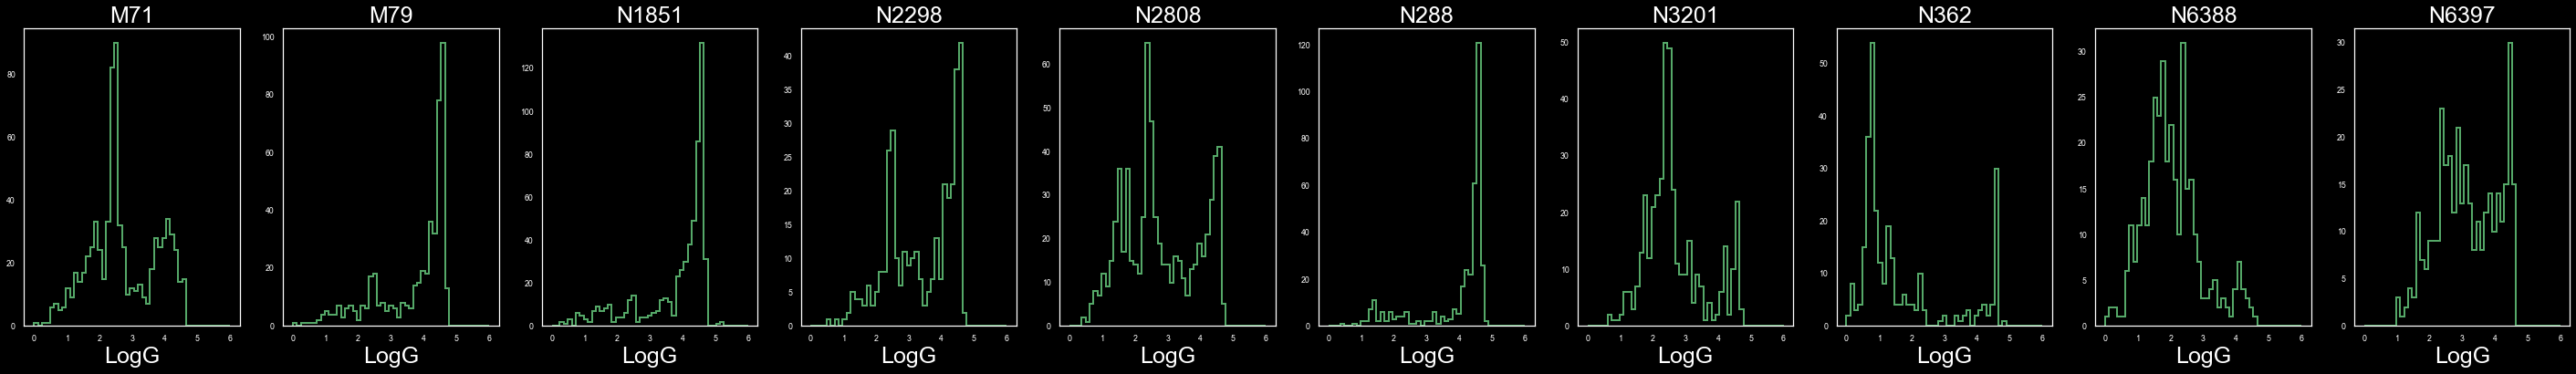

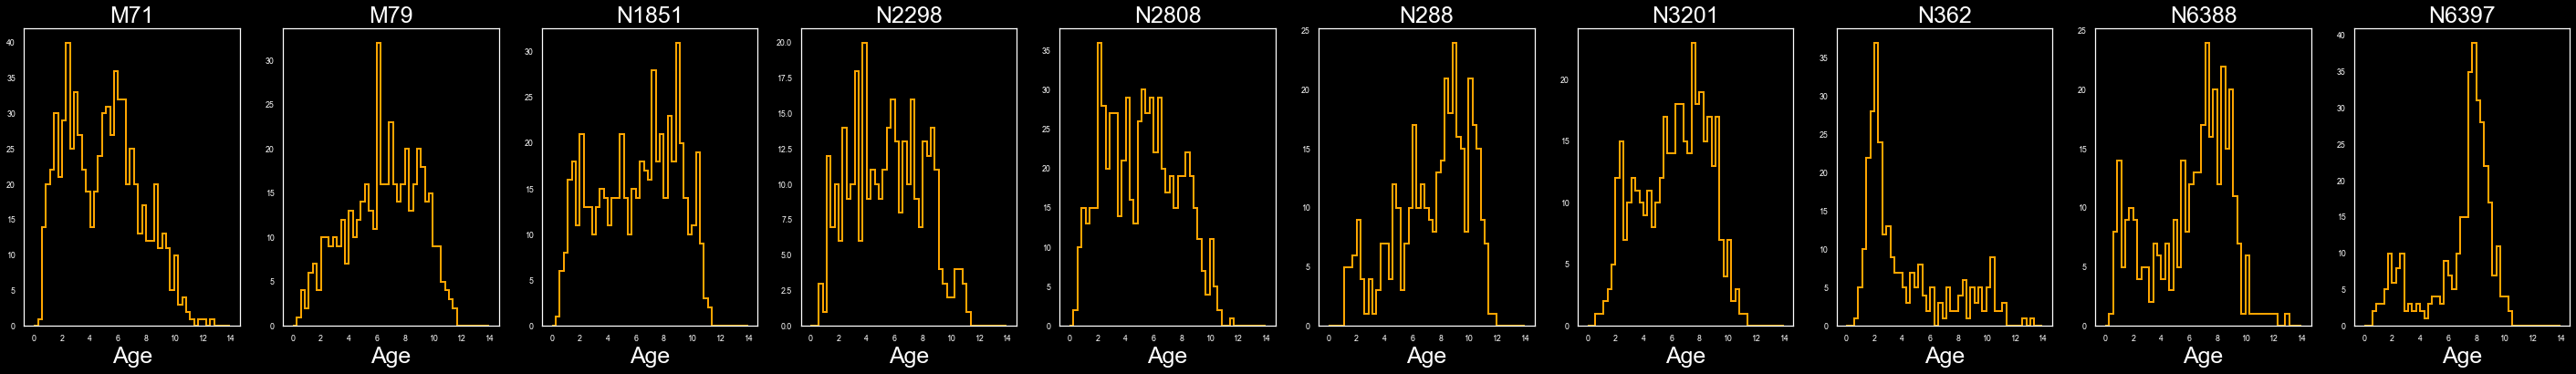

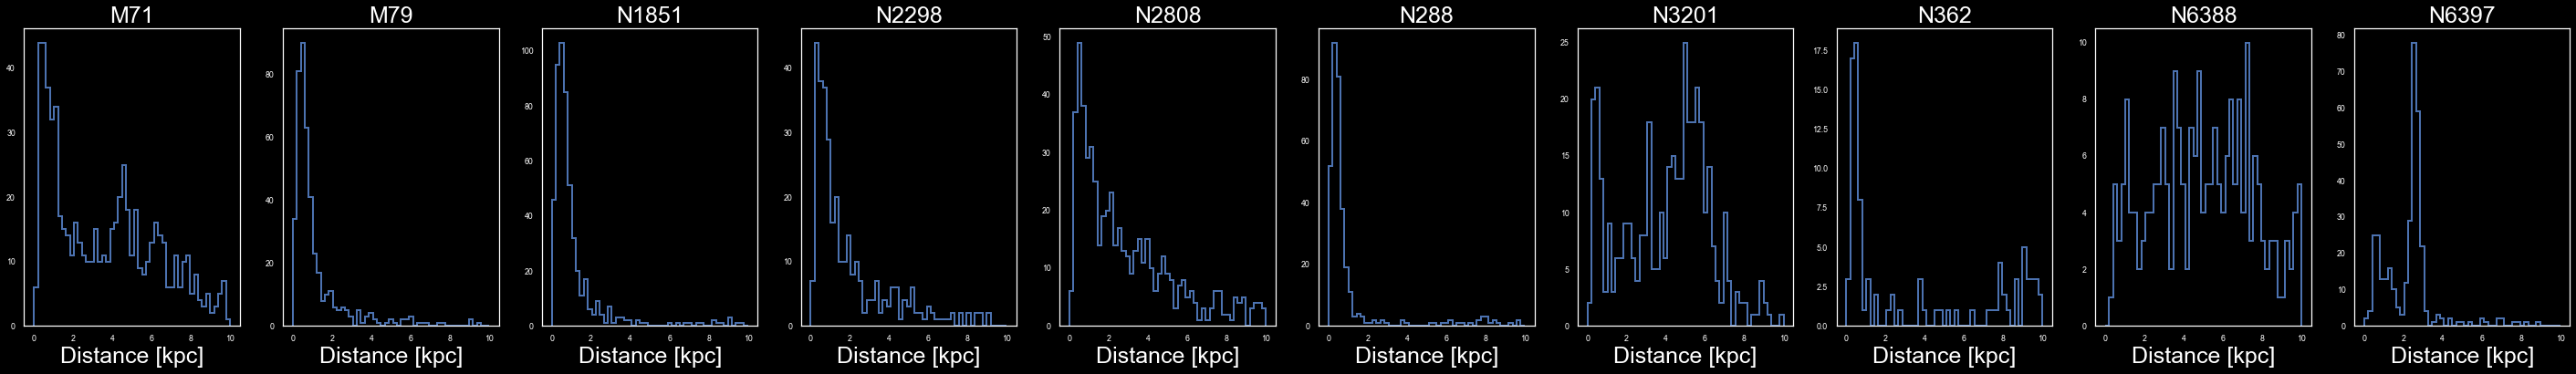

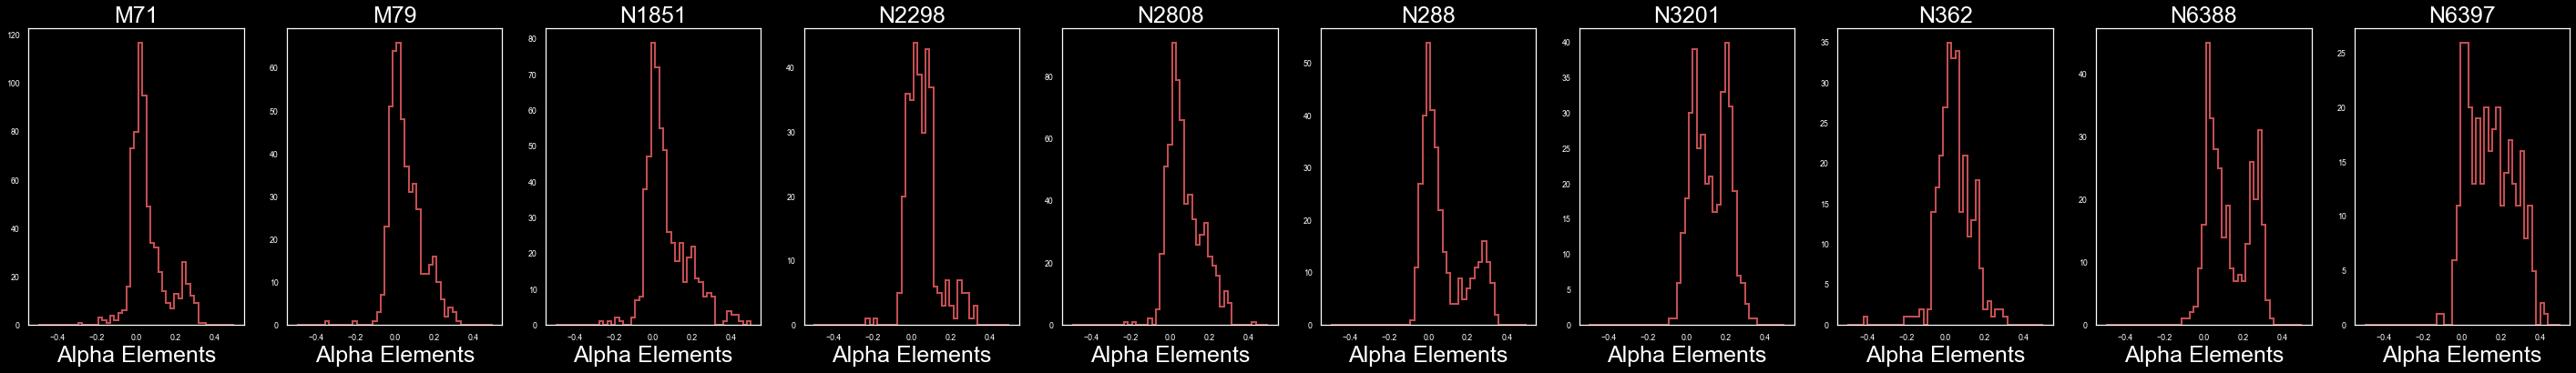

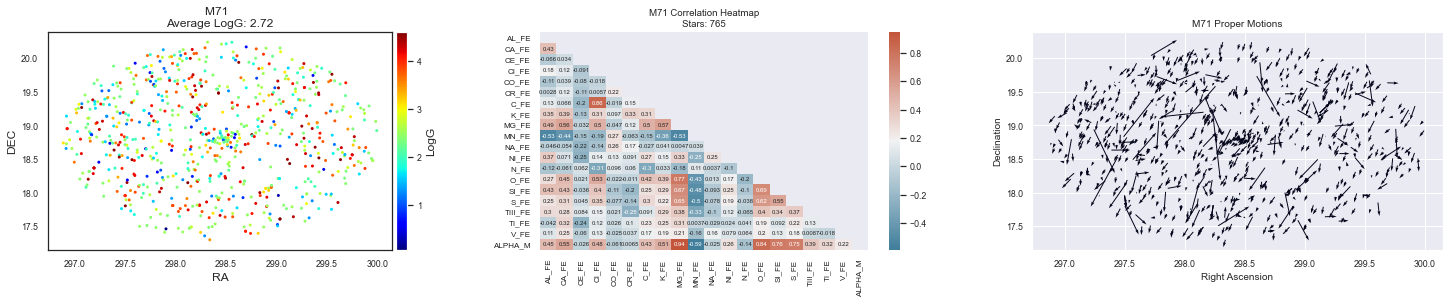

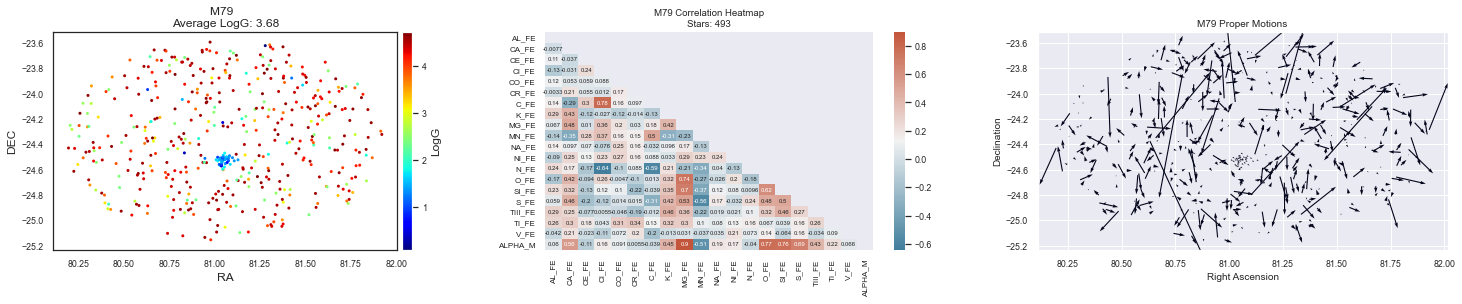

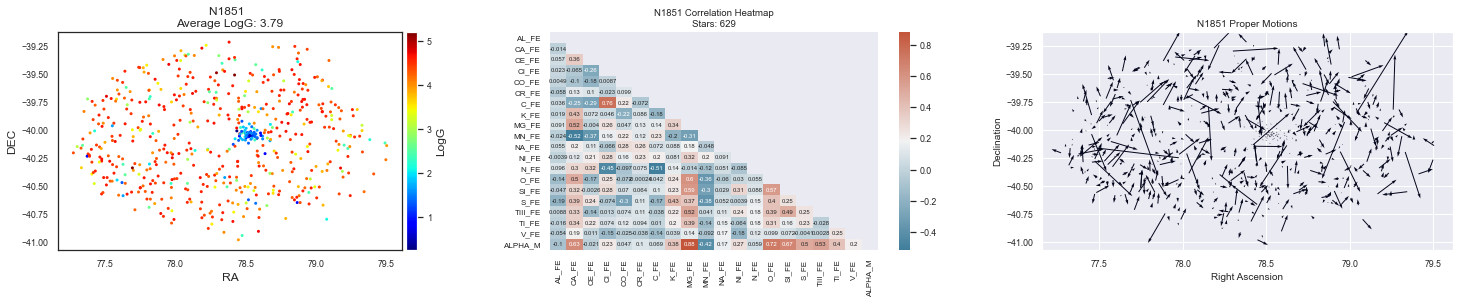

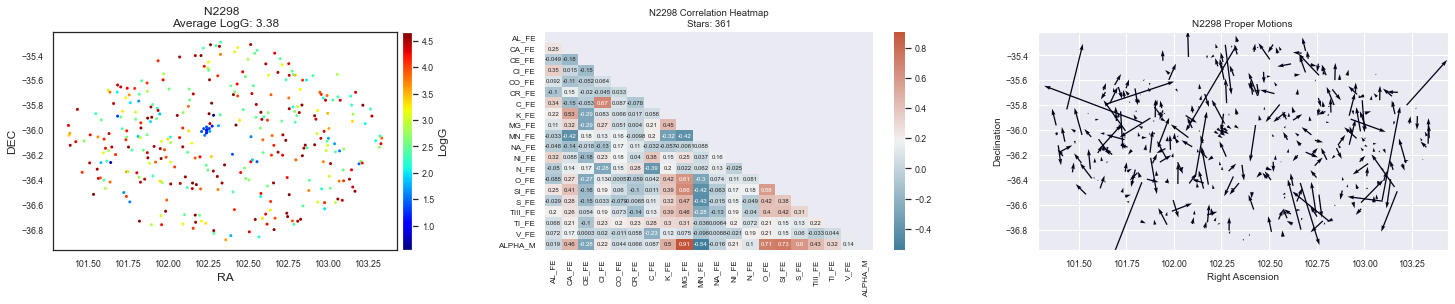

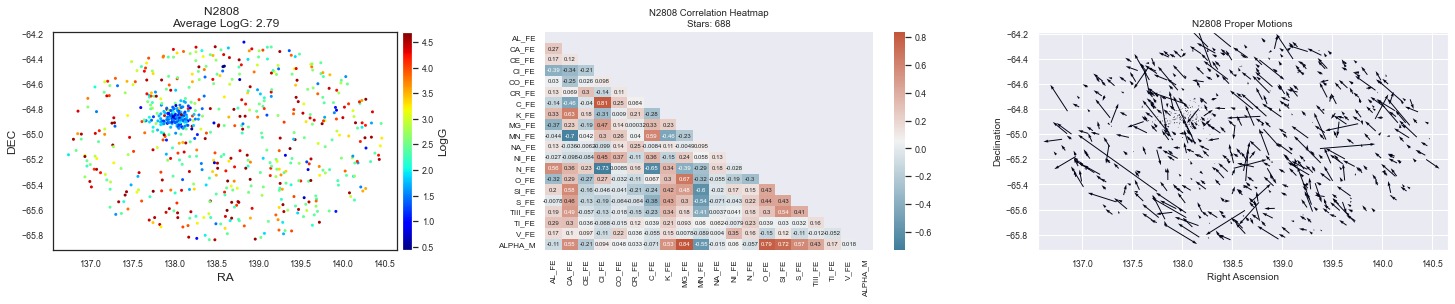

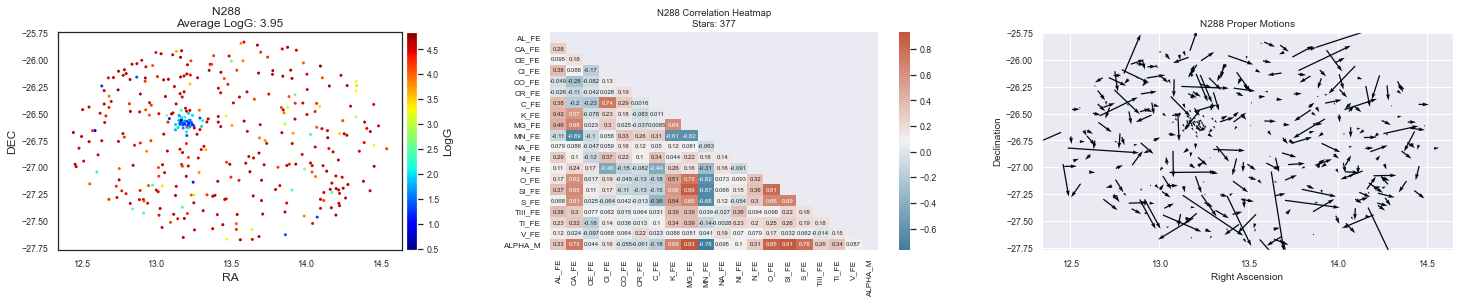

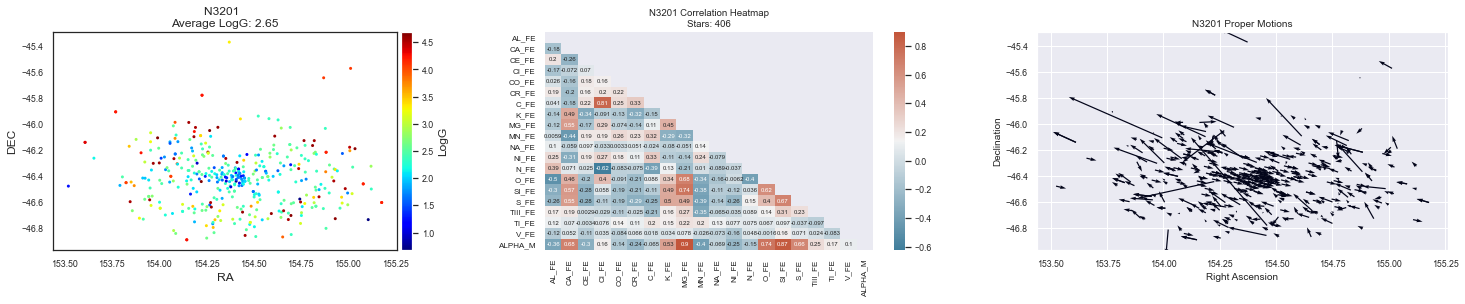

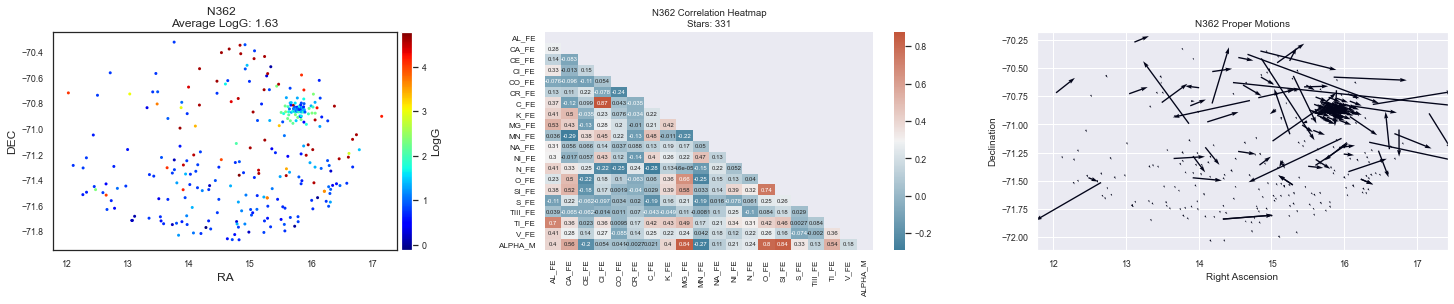

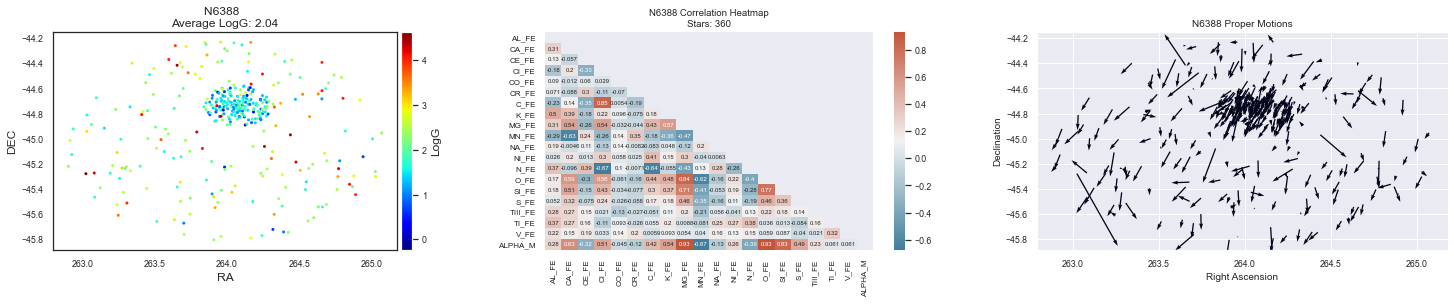

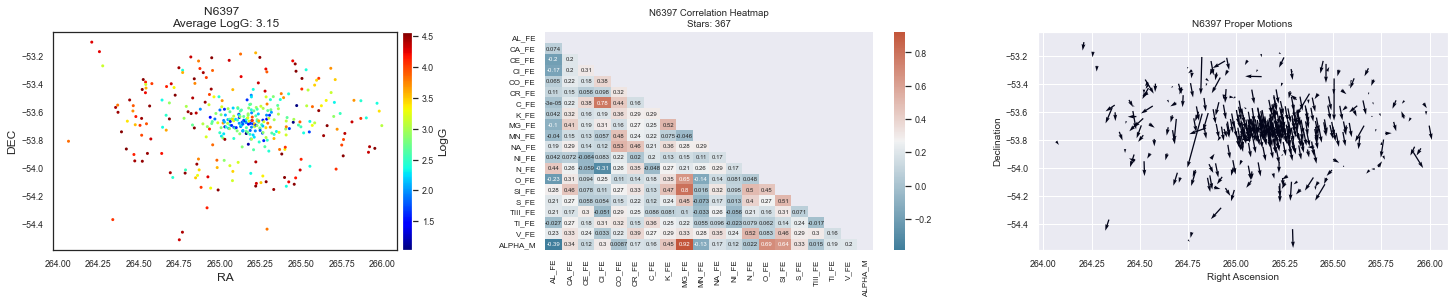

In [42]:
fields_list = unique_fields[10:20]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

['N288' 'N3201' 'N362' 'N6388' 'N6397' 'N6441' 'N6752' 'Omegacen'
 'Omegacen2' 'Sgr_faint']


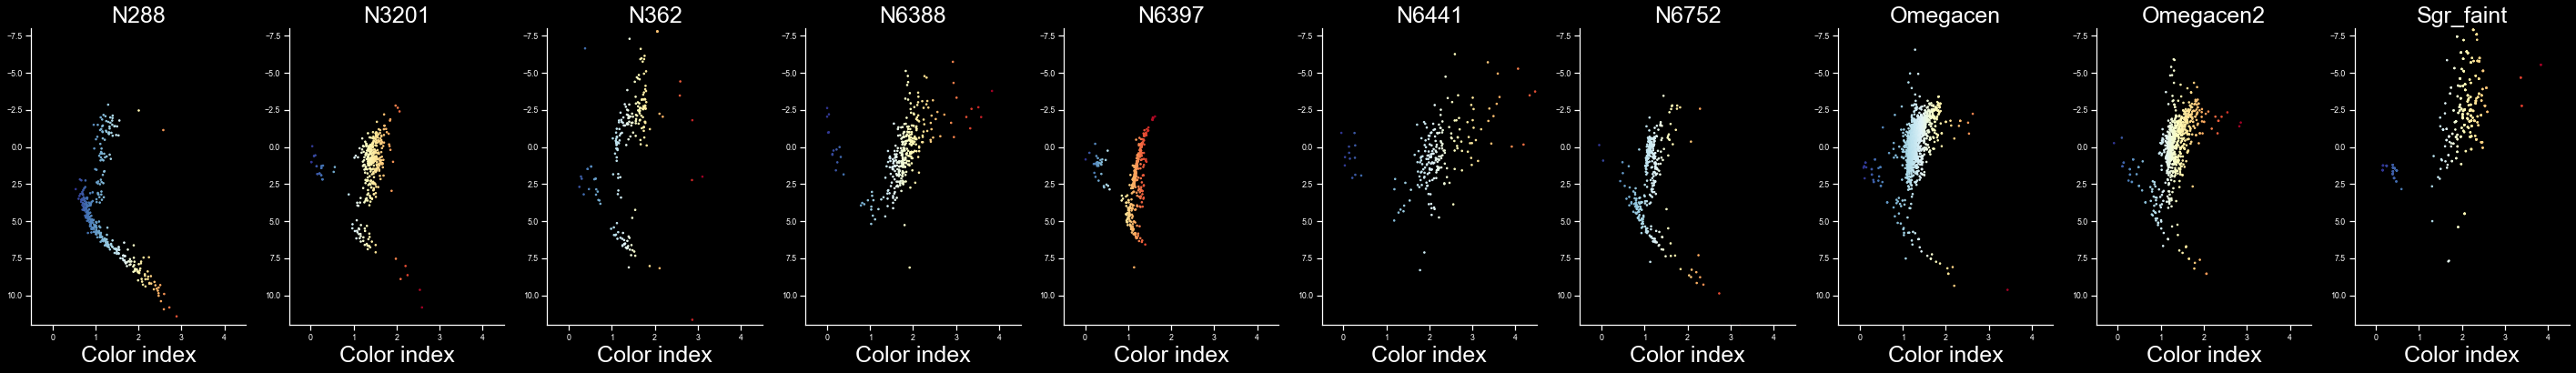

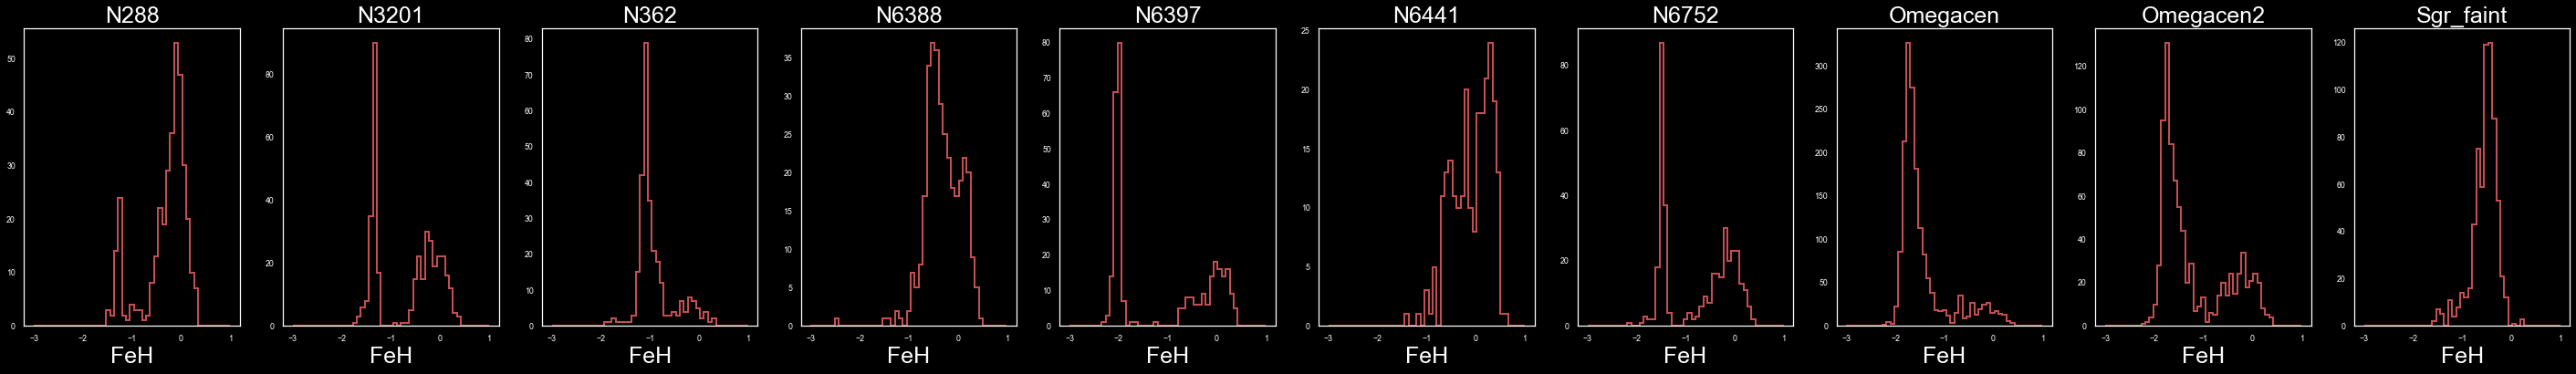

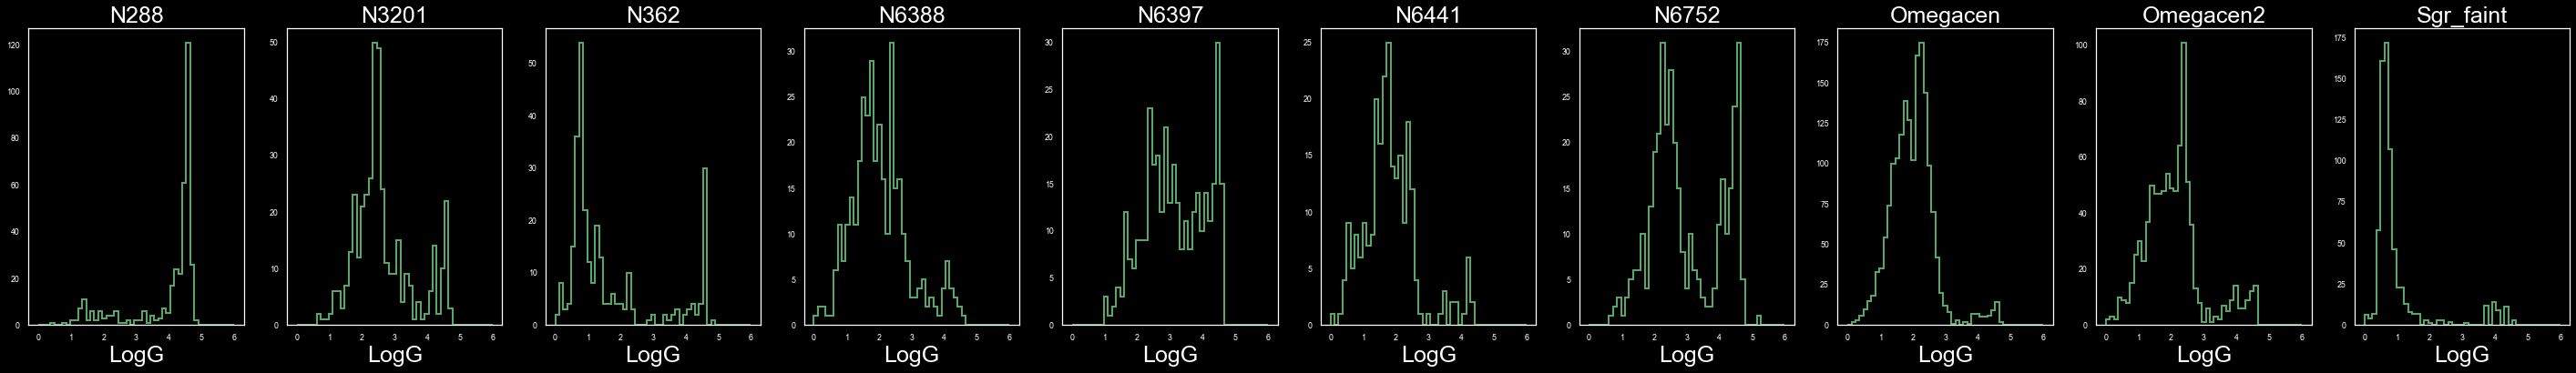

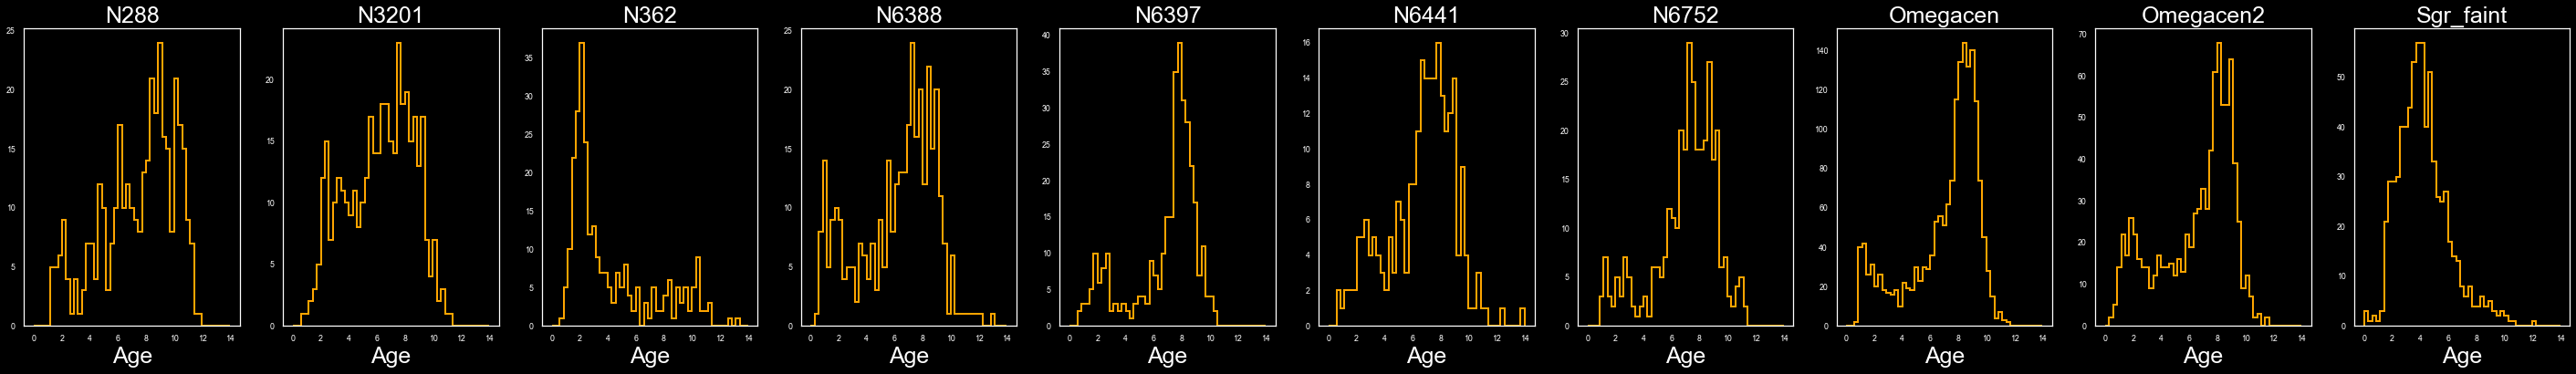

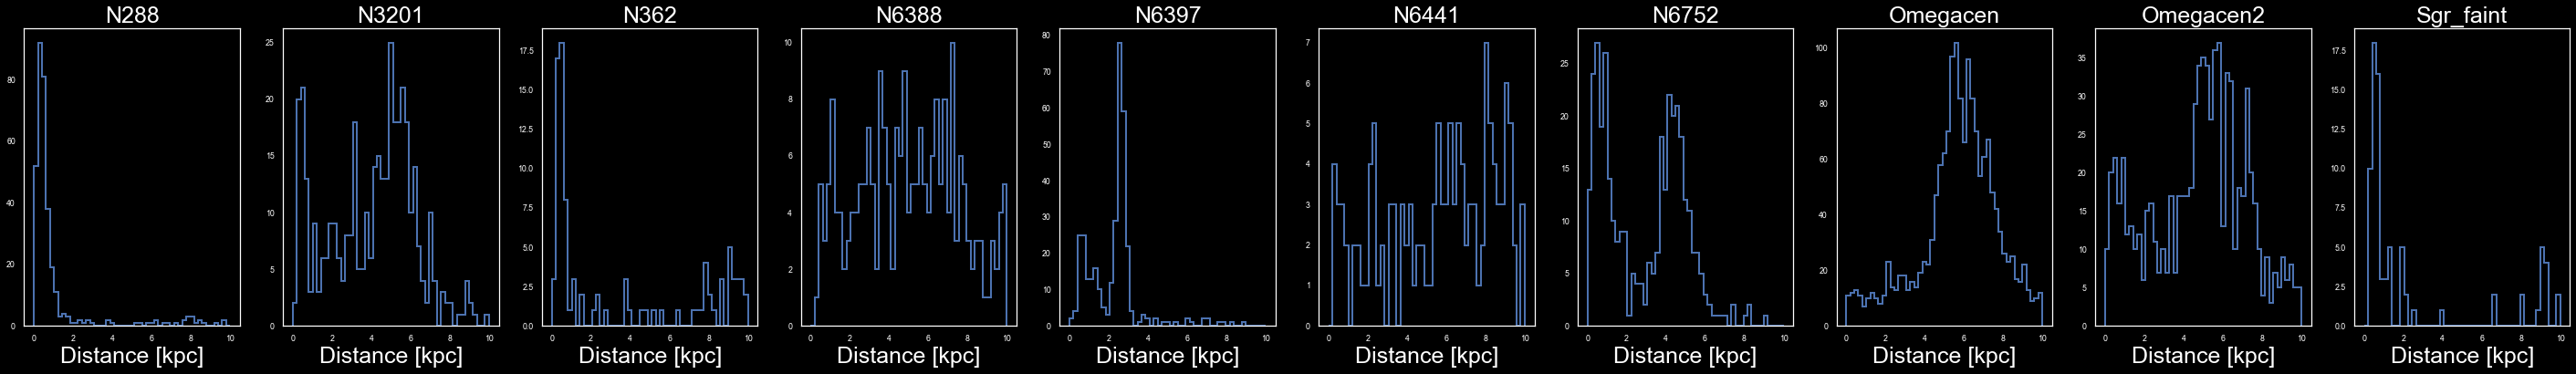

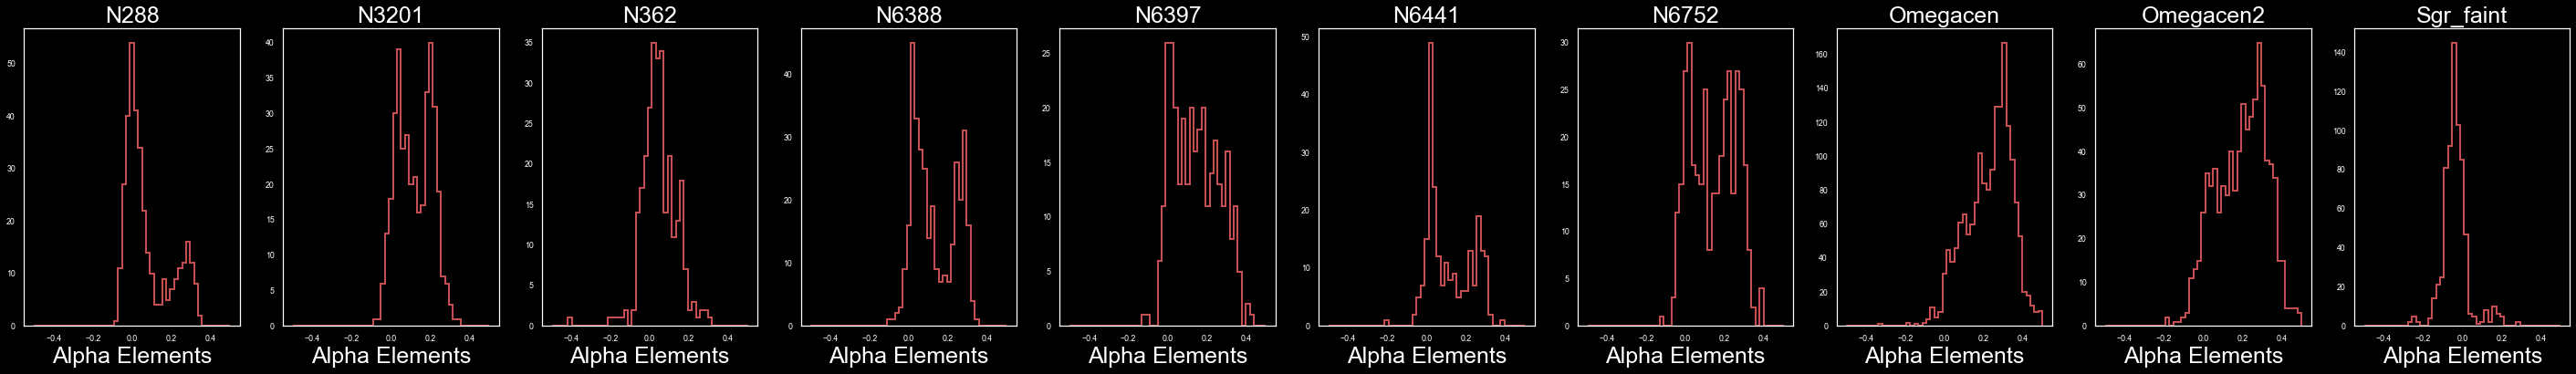

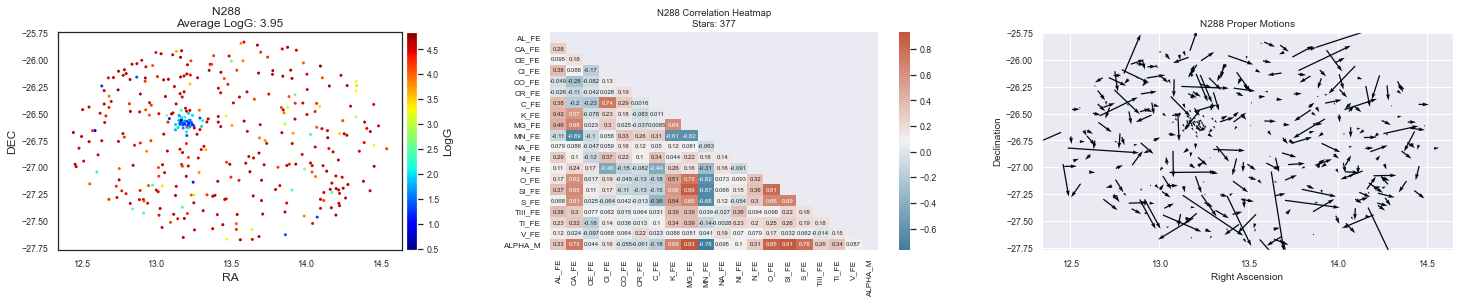

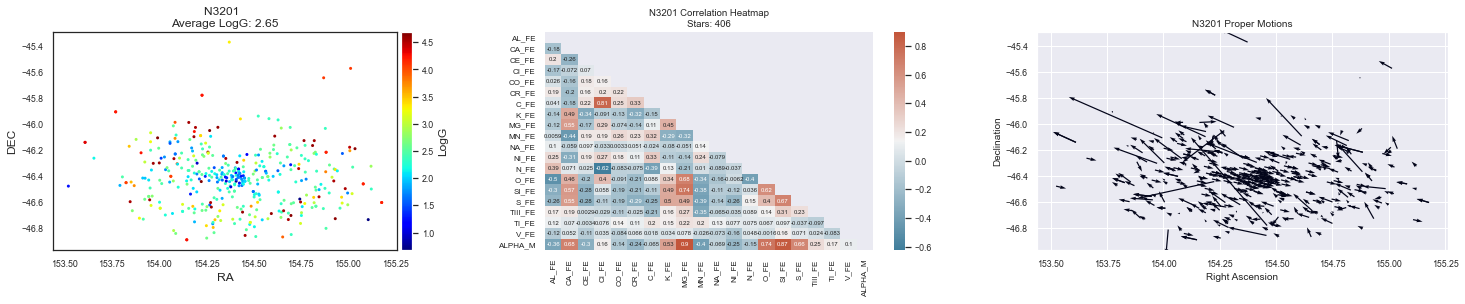

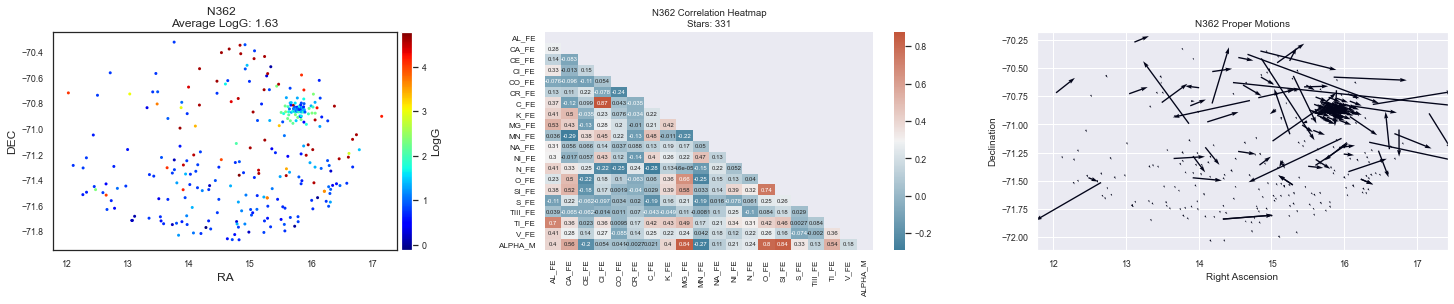

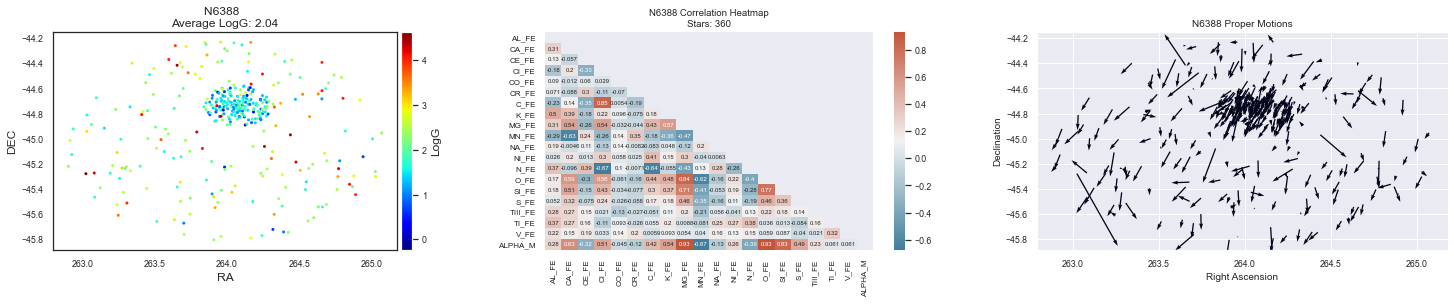

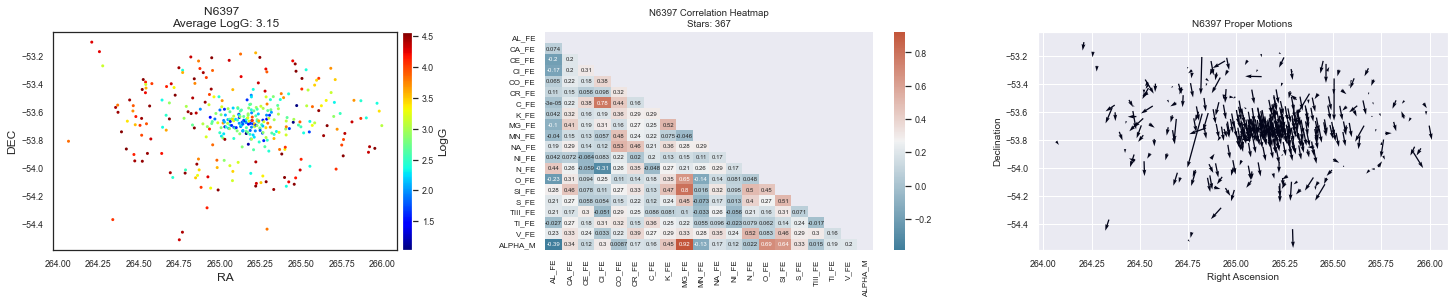

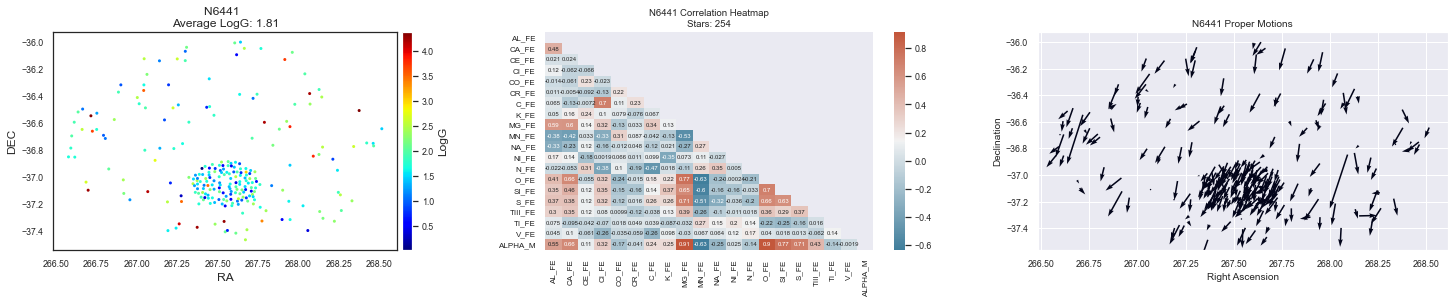

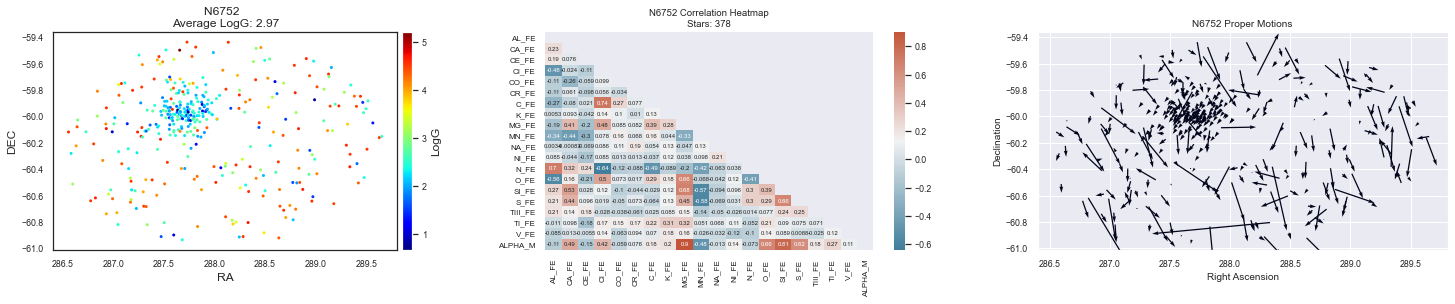

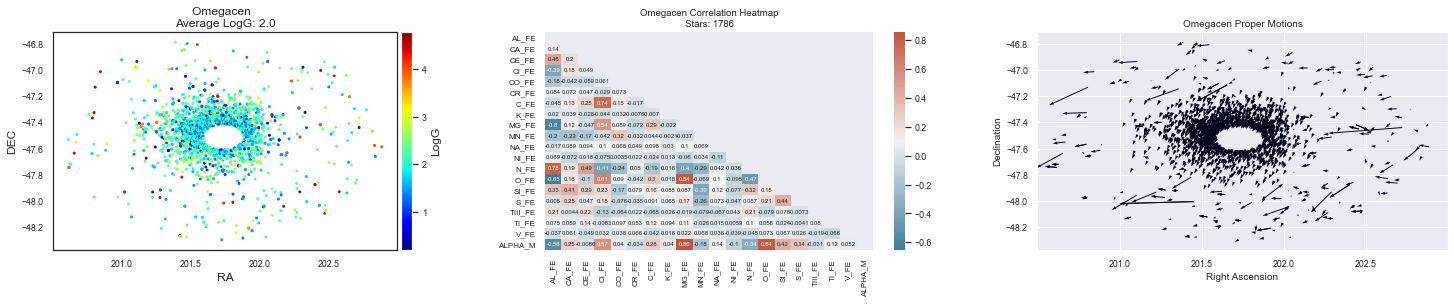

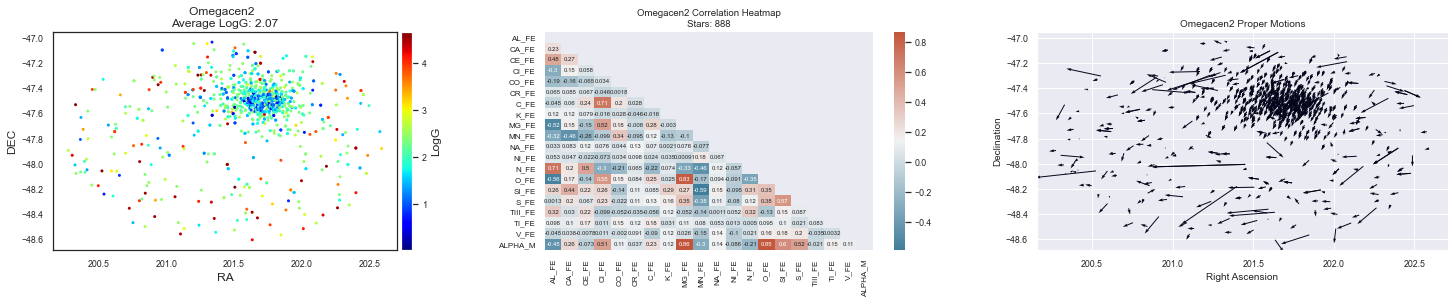

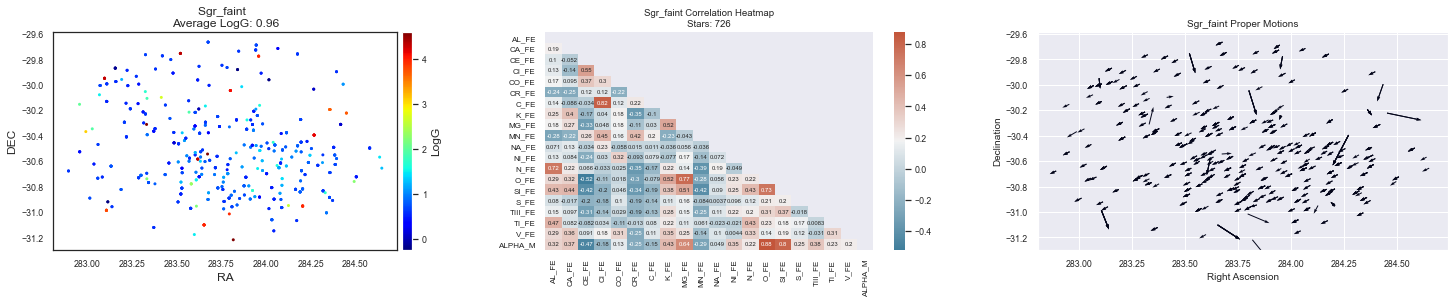

In [43]:
fields_list = unique_fields[15:25]  # <--- Note change fron 20:30 to 15:25, since there are only 25 gc fields, static code restriction, to maintain 10 star fields per field list 

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[30:40]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[40:50]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[50:60]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[60:70]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[70:80]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[80:90]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [ ]:
fields_list = unique_fields[90:100]

print(fields_list)

print_hr_details_flag = "N"

Plot_HR_Diagram(fields_list,-0.5, 4.5, -8, 12)
Plot_Feh(fields_list,-0.5, 4.5, -8, 12)
Plot_LogG(fields_list,-0.5, 4.5, -8, 12)
Plot_Age(fields_list,-0.5, 4.5, -8, 12)
Plot_Distance(fields_list,0, 10, -8, 12)
Plot_Alpha_Elements(fields_list,-0.5, 4.5, -8, 12)
Plot_Proper_Motion(fields_list,-0.5, 4.5, -5, 13)

if print_hr_details_flag == "Y":
    HR_Details(fields_list)

In [79]:
s1 = df_Apogee

print('Stars: '   + str(s1.shape[0]))

BA1 = s1[s1['ASPCAP_GRID'].isin(['BA'])]
Fd1 = s1[s1['ASPCAP_GRID'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
GKd1 = s1[s1['ASPCAP_GRID'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
GKg1 = s1[s1['ASPCAP_GRID'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
Md1 = s1[s1['ASPCAP_GRID'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
Mg1 = s1[s1['ASPCAP_GRID'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]

print("\nBA " + str(BA1.shape[0]))
print("Fd: " + str(Fd1.shape[0]))
print("GKd: " + str(GKd1.shape[0]))
print("GKg: " + str(GKg1.shape[0]))
print("Md: " + str(Md1.shape[0]))
print("Mg: " + str(Mg1.shape[0]))

Stars: 14232

BA 307
Fd: 1276
GKd: 2589
GKg: 8485
Md: 378
Mg: 1185


In [80]:
s1 = df_Apogee

idx_BA  = sp.where( (s1['ASPCAP_GRID'] == 'BA') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Fd_a = sp.where( (s1['ASPCAP_GRID'] == 'Fd_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_b = sp.where( (s1['ASPCAP_GRID'] == 'Fd_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_c = sp.where( (s1['ASPCAP_GRID'] == 'Fd_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_d = sp.where( (s1['ASPCAP_GRID'] == 'Fd_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_GKd_a = sp.where( (s1['ASPCAP_GRID'] == 'GKd_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_b = sp.where( (s1['ASPCAP_GRID'] == 'GKd_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_c = sp.where( (s1['ASPCAP_GRID'] == 'GKd_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_d = sp. where( (s1['ASPCAP_GRID'] == 'GKd_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_GKg_a = sp.where( (s1['ASPCAP_GRID'] == 'GKg_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_b = sp.where( (s1['ASPCAP_GRID'] == 'GKg_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_c = sp.where( (s1['ASPCAP_GRID'] == 'GKg_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_d = sp.where( (s1['ASPCAP_GRID'] == 'GKg_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Md_b = sp.where( (s1['ASPCAP_GRID'] == 'Md_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_c = sp.where( (s1['ASPCAP_GRID'] == 'Md_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_d = sp.where( (s1['ASPCAP_GRID'] == 'Md_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_a = sp.where( (s1['ASPCAP_GRID'] == 'Md_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Mg_a = sp.where( (s1['ASPCAP_GRID'] == 'Mg_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_b = sp.where( (s1['ASPCAP_GRID'] == 'Mg_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_c = sp.where( (s1['ASPCAP_GRID'] == 'Mg_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_d = sp.where( (s1['ASPCAP_GRID'] == 'Mg_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

s1Label = "All"

print('\n' + s1Label + ': Stars '   + str(s1.shape[0]))

print('\nBA' + ': Stars '   + str(idx_BA.shape[0]))

print('\nFd_a' + ': Stars '   + str(idx_Fd_a.shape[0]))
print('Fd_b' + ': Stars '     + str(idx_Fd_b.shape[0]))
print('Fd_c' + ': Stars '     + str(idx_Fd_c.shape[0]))
print('Fd_d' + ': Stars '     + str(idx_Fd_d.shape[0]))


print('\nGKd_a' + ': Stars '   + str(idx_GKd_a.shape[0]))
print('GKd_b' + ': Stars '     + str(idx_GKd_b.shape[0]))
print('GKd_c' + ': Stars '     + str(idx_GKd_c.shape[0]))
print('GKd_d' + ': Stars '     + str(idx_GKd_d.shape[0]))


print('\nGKg_a' + ': Stars '   + str(idx_GKg_a.shape[0]))
print('GKg_b' + ': Stars '     + str(idx_GKg_b.shape[0]))
print('GKg_c' + ': Stars '     + str(idx_GKg_c.shape[0]))
print('GKg_d' + ': Stars '     + str(idx_GKg_d.shape[0]))


print('\nMd_a' + ': Stars '   + str(idx_Md_a.shape[0]))
print('Md_b' + ': Stars '     + str(idx_Md_b.shape[0]))
print('Md_c' + ': Stars '     + str(idx_Md_c.shape[0]))
print('Md_d' + ': Stars '     + str(idx_Md_d.shape[0]))


print('\nMg_a' + ': Stars '   + str(idx_Mg_a.shape[0]))
print('Mg_b' + ': Stars '     + str(idx_Mg_b.shape[0]))
print('Mg_c' + ': Stars '     + str(idx_Mg_c.shape[0]))
print('Mg_d' + ': Stars '     + str(idx_Mg_d.shape[0]))


All: Stars 14232

BA: Stars 284

Fd_a: Stars 514
Fd_b: Stars 332
Fd_c: Stars 272
Fd_d: Stars 110

GKd_a: Stars 1038
GKd_b: Stars 677
GKd_c: Stars 645
GKd_d: Stars 229

GKg_a: Stars 3834
GKg_b: Stars 1919
GKg_c: Stars 2082
GKg_d: Stars 650

Md_a: Stars 140
Md_b: Stars 106
Md_c: Stars 97
Md_d: Stars 35

Mg_a: Stars 578
Mg_b: Stars 259
Mg_c: Stars 240
Mg_d: Stars 108
